In [53]:
from locallib import crypto
from locallib import eyeutil
import matplotlib.pyplot as plt
import numpy as np

def expandOutput():
  display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# Base Trigrams

---

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

Rb%P^-k=8]Jfb^@.q(/n"=-Q!prH_q53 HSa:.5fOLPJ3P-O3Qh?%8#K[cAQI\5:>%94g+jX$j3g$SIKphV_oq/0L?>,AY<-`KP
pb%P^-k=8]Jfb^@.q(/n"=-Q!=+>Tq53 9:V4.5fOLPJ3P-O3QL:[m`Ko<h`!>i7c&A9`qdN1D-15d-)NcYB^r/*i^"+ahEL*Kd^)B2
Db%P^-k=8]Jfb^@.q(/n"=-Q!elT)Pbp6`YHQn#0X3OHp&-`=Q`_&Q?-0*M8:m*\q]BVf5/$bmJE>6 +IhY47YaI72hJ%#:n(%VMm9`]0LVS4_9+:MU\FB
lb%QkVeN@!J\:PRp@8W]O,5,QVB9D/XW4)(^-r)L=\UrJp%Kg#pmOnB9^2*Q^`Tq+b^-O1Tf:7@?`7C@R&!9(EOK:ladp1'M_.U_\0
_b%QkV"\=HnO\kcg\"a'O.Mj[Ip-\-q6CRHG"[P?l"pk!Xc+5(HaMkWG\J-#6Y"&Z)f!ZX_d9o'43`"bi>g0,>aE4-6_2N`[Iqr6nDO1$&1%Do_!`e/K$ZX?.`Z2Lne! N4gi9C(8
Bb%QkV7j+-<:3PcYE\B<j*1@+23K3qJ$^)NQ@SlZ$KO1co5@L0>E:<IdYBS*ef(&NK2GOK/-A>C^E E%FWE-H9)5+`%oJd+g+P#c]H6.CR]G+"bQSU1iDkjV8>Vf
;b%QkV"\=H"W)/[2d#D%OmLF!2<l$B\_Zp1VokPVW3^`.OSfk%+OMZdeo9FMiOdRBMn:oY$X6\2kK\[c_JQAHaom'#:^?n:YeH$7:-cJFh+Ga\9&p

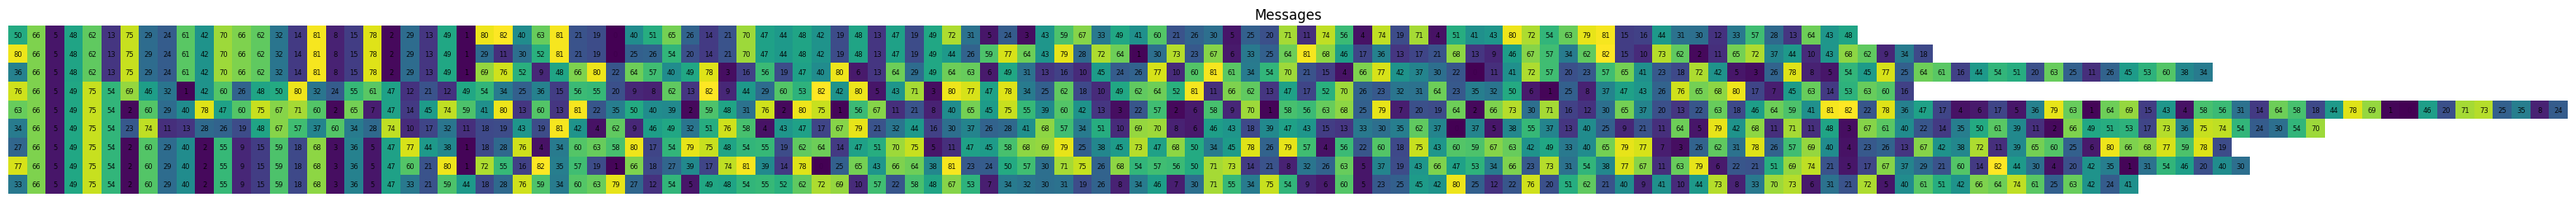

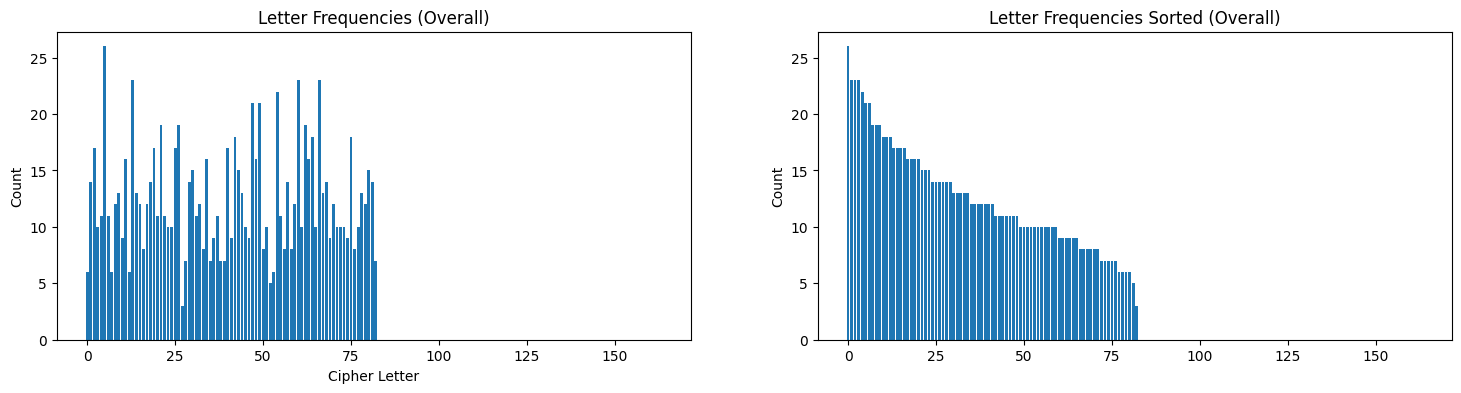

Letter Frequencies (Per message)
--------------------------------


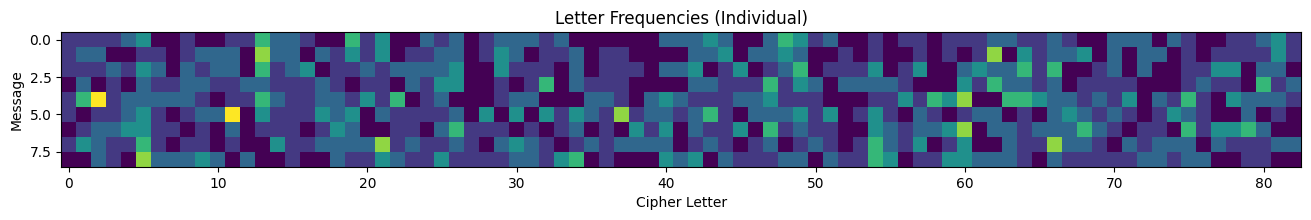

In [3]:
crypto.full_overview(eyeutil.msgs_eye_tri)

Kappa Auto-Correlation Test
---------------------------


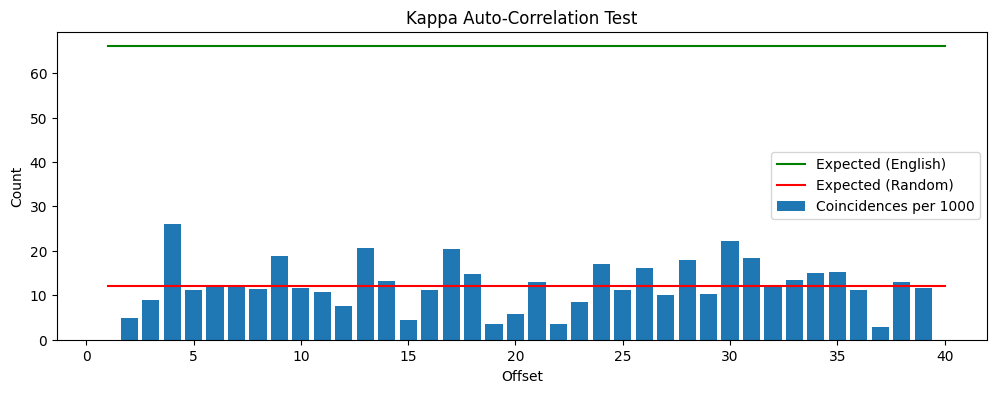

Kappa Periodic Test
-------------------


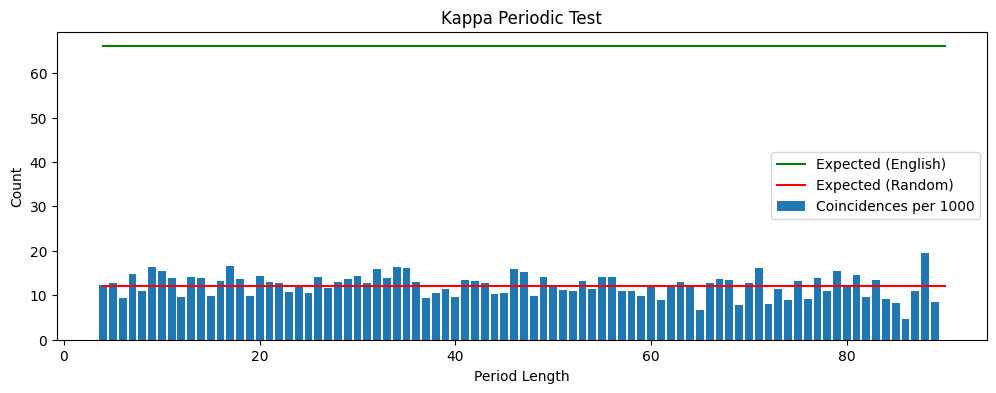

In [4]:
crypto.plot_msgs_kappa_auto(eyeutil.msgs_eye_tri)
crypto.plot_msgs_kappa_periodic(eyeutil.msgs_eye_tri)

# Variant: Unpaired

---

Letter Frequencies (Per message)
--------------------------------


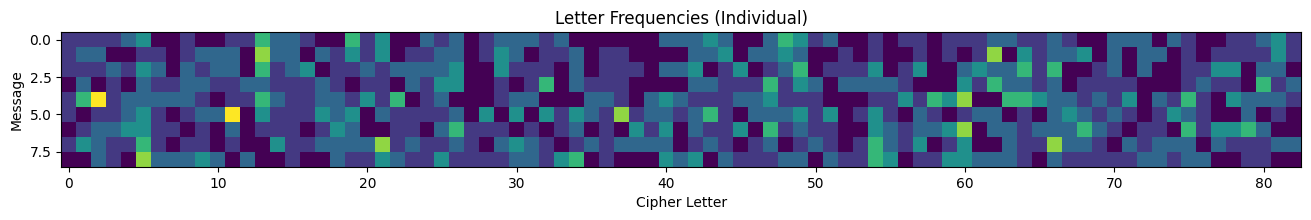

In [5]:
crypto.plot_msgs_freq_individual(eyeutil.msgs_eye_tri)

In [6]:
eyeMesagesTriSplit = []

for msg in eyeutil.msgs_eye_tri:
  even = []
  odd = []
  for i in range(len(msg)):
    if i % 2 == 0: even.append(msg[i])
    else: odd.append(msg[i])
  eyeMesagesTriSplit.append(even)
  eyeMesagesTriSplit.append(odd)

Letter Frequencies (Per message)
--------------------------------


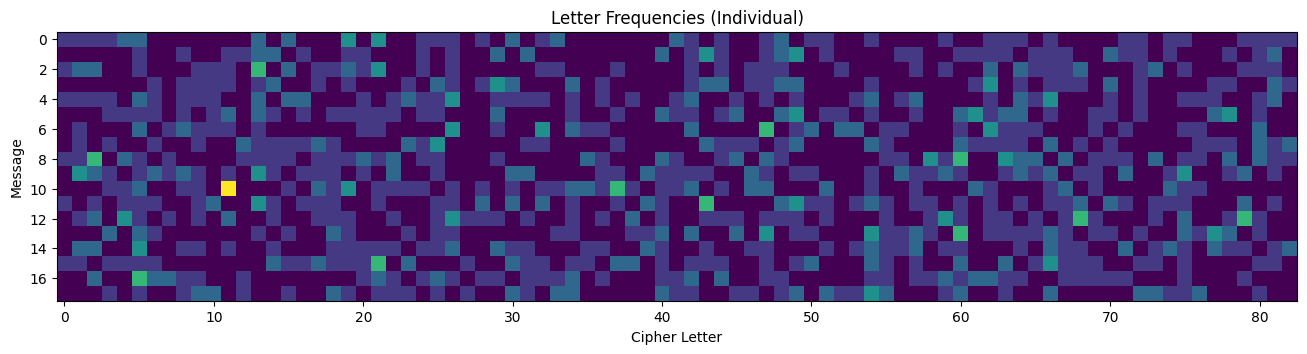

In [7]:
crypto.plot_msgs_freq_individual(eyeMesagesTriSplit)

# Max Min Graph

---

In [8]:
print(eyeutil.msgs_eye_tri[0][0])

50


In [9]:
runningRange = [ ]
for e in eyeutil.msgs_eye_tri[0]:
  if len(runningRange) == 0:
    runningRange.append(( eyeutil.msgs_eye_tri[0][0], eyeutil.msgs_eye_tri[0][0] ))
  else:
    newRange = ( min(runningRange[-1][0], e), max(runningRange[-1][1], e) )
    runningRange.append(newRange)


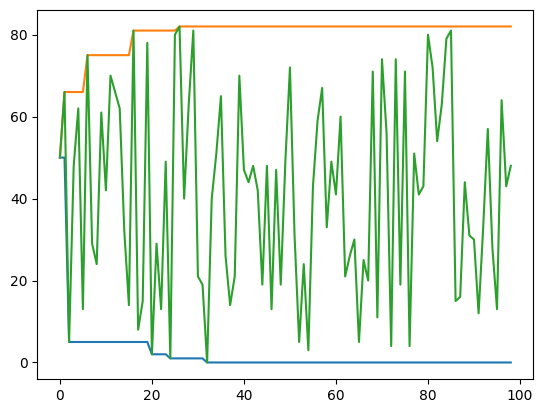

In [10]:
plt.plot(runningRange)
plt.plot(eyeutil.msgs_eye_tri[0])

In [11]:
from functools import reduce
def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

for msg in eyeutil.msgs_eye_tri:
  print(len(msg))
  print(factors(len(msg)))

99
{1, 33, 3, 99, 9, 11}
103
{1, 103}
118
{1, 2, 59, 118}
102
{1, 2, 3, 34, 102, 6, 17, 51}
137
{1, 137}
124
{1, 2, 4, 124, 62, 31}
119
{1, 7, 17, 119}
120
{1, 2, 3, 4, 5, 6, 40, 8, 10, 12, 15, 20, 120, 24, 60, 30}
114
{1, 2, 3, 38, 6, 114, 19, 57}


# Variant: Positionless

---

In [12]:
eyeutil.msgs_eye_triflat[0][0]

'200'

In [28]:
def conv_eye_to_dir(e):
  if e == '0': return ( 0,  0)
  if e == '1': return ( 0, -1)
  if e == '2': return ( 1,  0)
  if e == '3': return ( 0,  1)
  if e == '4': return (-1,  0)

def conv_eye_to_pos(flat):
  p1 = conv_eye_to_dir(flat[0])
  p2 = conv_eye_to_dir(flat[1])
  p3 = conv_eye_to_dir(flat[2])
  final = ( p1[0] + p2[0] + p3[0], p1[1] + p2[1] + p3[1] )
  return "(" + str(final[0]) + "," + str(final[1]) + ")"

UID = crypto.UID()
eyeMessagesPosition = [ [ conv_eye_to_pos(tri) for tri in msg ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesPositionUnique = [ [ UID.get_uid(pos) for pos in msg ] for msg in eyeMessagesPosition ]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

AABCDEFGHIAJADKJBJFLAGEMBJAJNBGOJJPEQJGJBCCAOCEBOMARBHFFBNBMBSGQQBBCBPCKCCOBCPBFJAJNOBFJCRQSBIJEAFC
JABCDEFGHIAJADKJBJFLAGEMBGPQSBGOJBQJCJGJBCCAOCEBOMCQBEAFOJAABQFONQBBABTUEKEEGTEGUNIUDAFAFDAPEAICAFTDGUL
KABCDEFGHIAJADKJBJFLAGEMBFJSGCAJJAIJMLFJKOBJJQEAGMANQMREJAGHQEASBIUJJGFCAEAIQJJPBAICOIEBOLAABFQLJBJGEBAIJCJPCNBPQGESAU
JABMFJFUKBASQCAJKHPIBSGSMJUBKFKPCGJDEAGCGSEAAJBFBFJEBLUBDLAMDASBPADEBESJQOKRAOPKAQBBJIBFQJETJEPGNJENSJ
NABMFJASGJLBSFNBSAEPBJGCBBJESEBJPAJBABCRJAJFBKNPGJJEGFPBSAEFJIAQAGJBAKNTBOPCOAAAFQBJSQEICEJNLUABBBAJLKBECQEBKONBAFFFCAKRJAALCLFBJUCBFBPJH
UABMFJOCPEJQOCNIISUJCAEKPLOFOBACDGUMKPJACFBENOGKCJQIQJBTIUPAFJJQUFLBBFFEBQPDIJIBAPIEJBGGPABOATPBPCFNIJJJPAIBPAAMPEEFKFCJHQJJ
PABMFJASGJAPGFBLTFKBBECABLJJCUSNAJEJOFCJPODAJBPJFBPBGATFOBAGFBTAUGLQOICKJSLFFSBNNAMBJEOEPFQDRLQIFJCOQENAAAPBESBQJATEBLO
EABMFJASGJAPGFBLTFKBBSGJBAPJAPIOBALPBECBBJLJBEFAAABOHAIQBFQTJIKABFJGJKQNBIOFABEUAOFRJAE

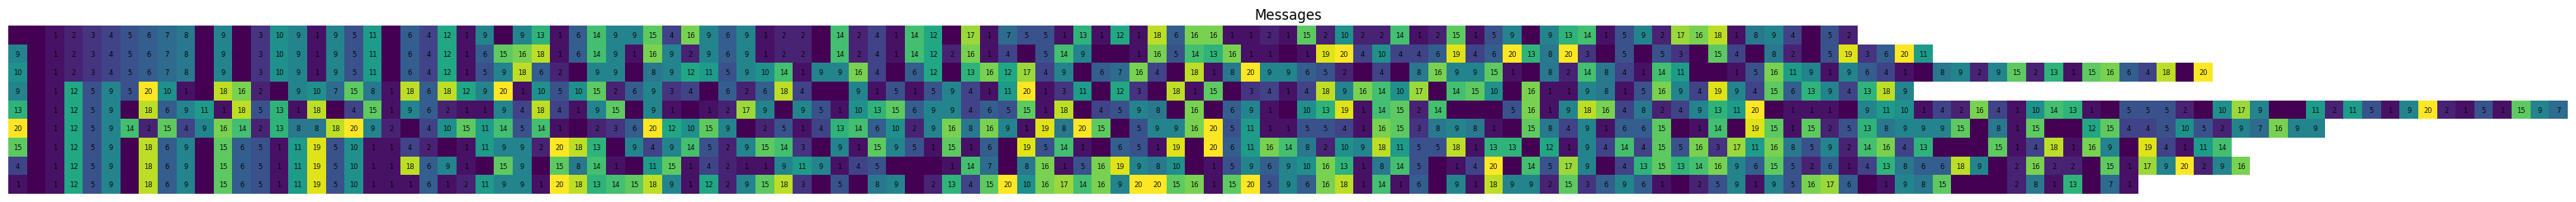

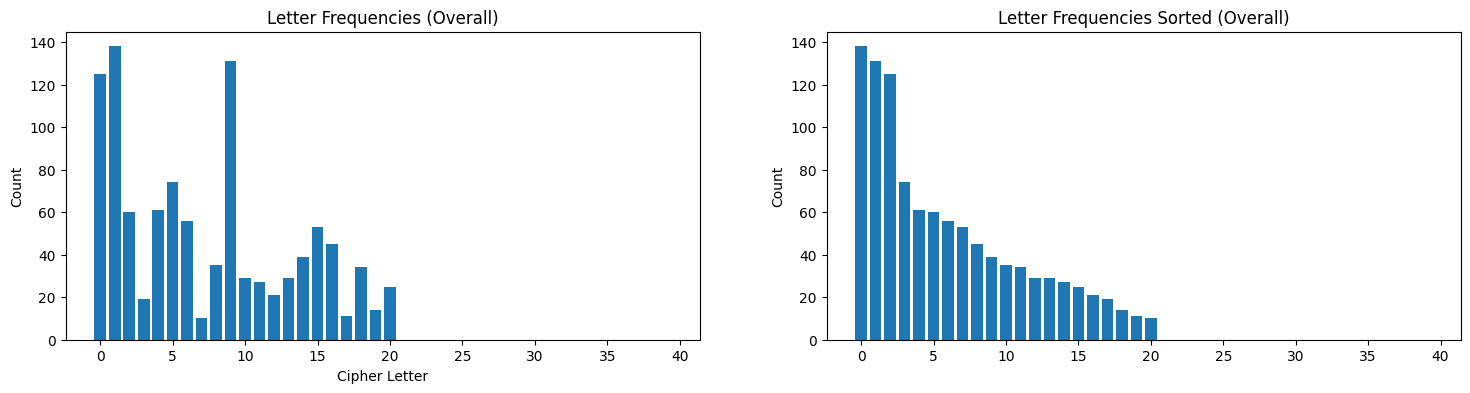

Letter Frequencies (Per message)
--------------------------------


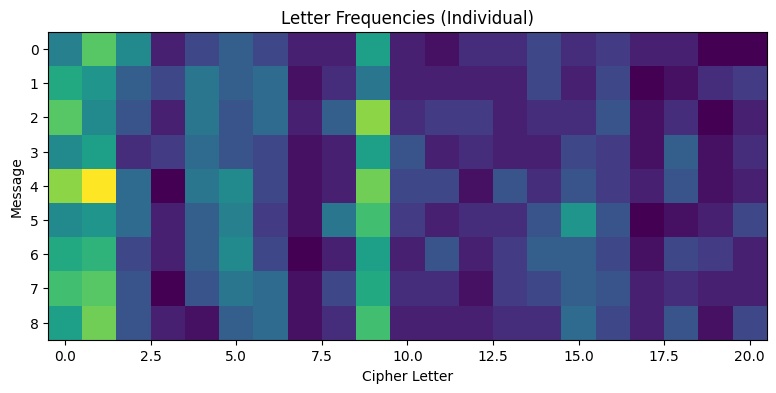

In [29]:
crypto.print_msgs_ascii(eyeMessagesPositionUnique, 65)
print("")
crypto.full_overview(eyeMessagesPositionUnique)

Kappa Auto-Correlation Test
---------------------------


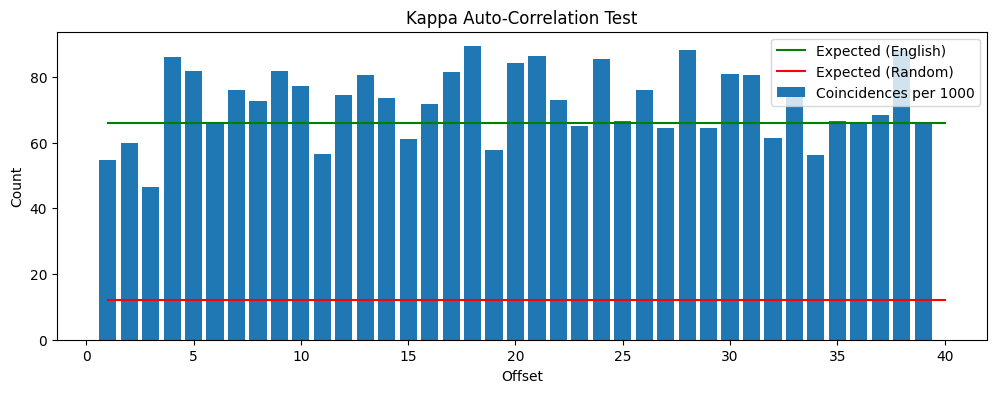


Kappa Periodic Test
-------------------


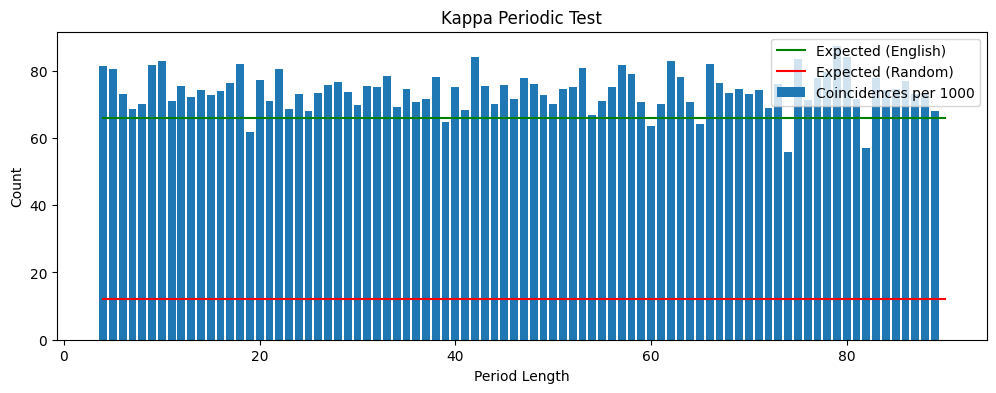

In [30]:
crypto.plot_msgs_kappa_auto(eyeMessagesPositionUnique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesPositionUnique)

In [31]:
eyeMessagesRandom = [ [ eyeutil.generate_random_msgs_triflat() for _ in msg ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesPositionRD = [ [ conv_eye_to_pos(flat) for flat in msg ] for msg in eyeMessagesRandom ]
UID = crypto.UID()
eyeMessagesPositionRDUnique = [ [ UID.get_uid(pos) for pos in msg ] for msg in eyeMessagesPositionRD ]

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

 !"# $%&'()$%&$*&$#+,-&./#(/' /$!()&"%/,'0$- 0/%&%(&1!$ (" &"&"$". &#'&$'( 0&2&%"" #  30.//&""(/ 2,
2$4 "! $&4"")$ 2-',$0'-" #"2,$&("2$"(1 (/%0$0(%0"20/2/%/$(3!$-+$$/%#52%3- "%30$($"  -%& -%0,3$&6/! &%#!
 (0 50#&&/ 0&0-&+"&2-&-(&0("0%6#" &$.,$/("/&/(7/($&$5%8."6$0 0 "$"'(8&!3'" %&(& 3& (/&4')+& /"01$$/%/$0# /)3&/.0(&$+/&
 /  8' ..&#5'4- $-(  " ".-/6$8%)08&.. -'--&"&8.%*!('"%&,(0""&-/ ( #3." "1&0$0- -$ (&02 0("/"&8"$ &$+/ 
0&!)23,"" 8-&4")40&$"!'05305"%&643+",&$ 0-0' ( 1&/51-76& 3%($$+(*" "50  0(/4#&-%&00/57+)(0.0#-4'0.//&$3"0.#"#"2(/5&$.3$0&*%+ &+$+1& 58"$-
$$&"%-""')7!%$!('55"&5-4355(2$/&$"&% $#"((!81++0!080(."%673 (/$"'0!$('/ 4 +&,&,*/"500,/$(($+- 0"'/&%)3$"5+')-(%.&/4,(%-/"$ &
4$$- ($.7&03"/." 30! (&&.!0 $$+4 04$"- 0"$0'/60 "&*6(/-&/3$&1-#000" -,)%-$21$02% &"&!$% ""0 &3"$/(0%""$1"8-#) 1$"

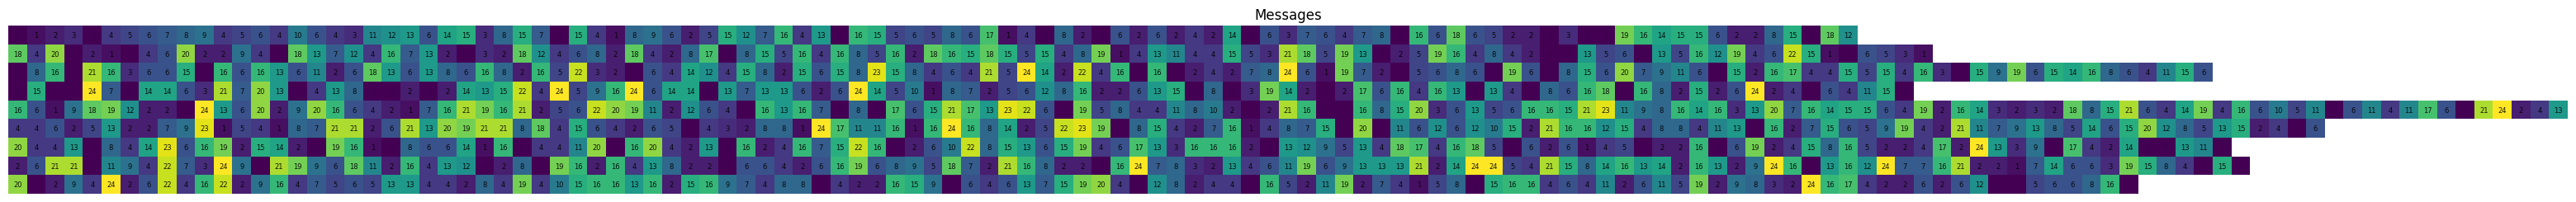

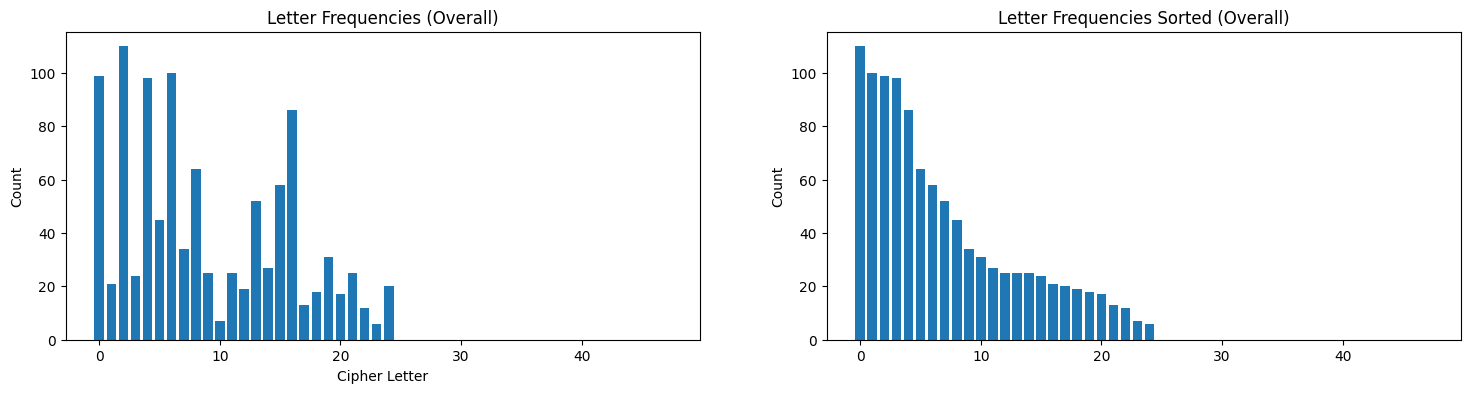

Letter Frequencies (Per message)
--------------------------------


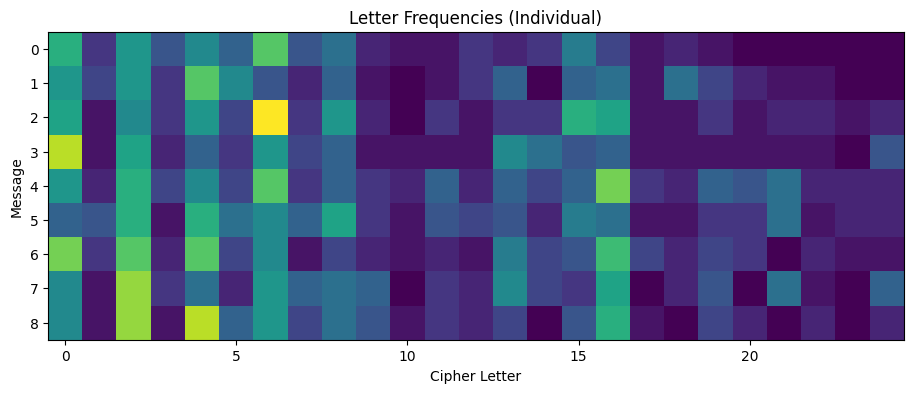

In [32]:
crypto.full_overview(eyeMessagesPositionRDUnique)

Kappa Auto-Correlation Test
---------------------------


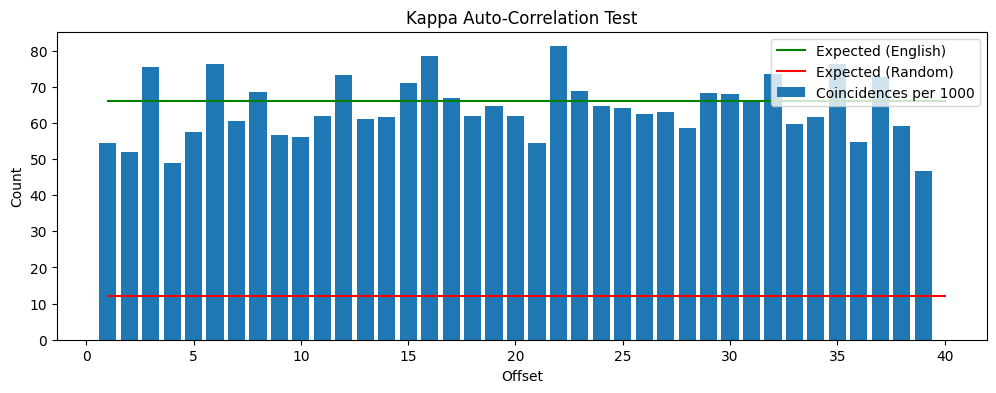


Kappa Periodic Test
-------------------


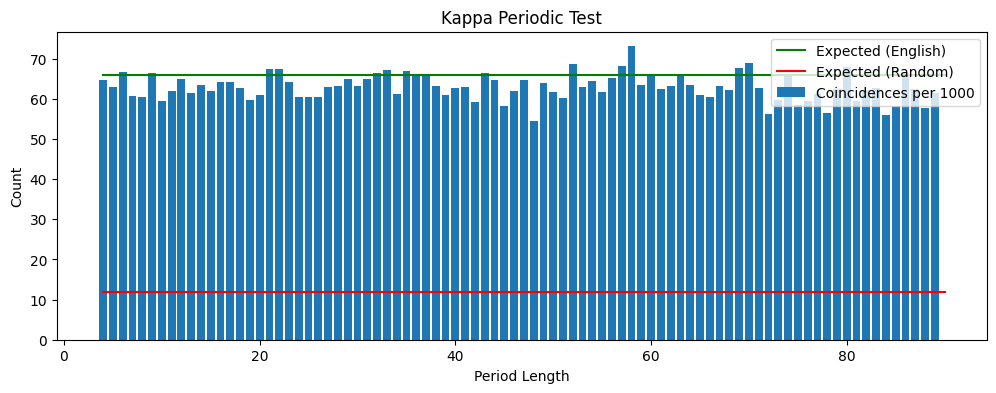

In [33]:
crypto.plot_msgs_kappa_auto(eyeMessagesPositionRDUnique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesPositionRDUnique)

# Variant: Positionless 3d 1

---

In [34]:
def conv_eye_to_dir3D1(e):
  if e == '0': return ( 0,  0,  1)
  if e == '1': return ( 0,  1,  0)
  if e == '2': return ( 1,  0,  0)
  if e == '3': return ( 0, -1,  0)
  if e == '4': return (-1,  0,  0)

def conv_eye_to_pos3D1(flat):
  p1 = conv_eye_to_dir3D1(flat[0])
  p2 = conv_eye_to_dir3D1(flat[1])
  p3 = conv_eye_to_dir3D1(flat[2])
  final = ( p1[0] + p2[0] + p3[0], p1[1] + p2[1] + p3[1], p1[2] + p2[2] + p3[2] )
  return "(" + str(final[0]) + "," + str(final[1]) + "," + str(final[2]) + ")"

eyeMessagesPosition3D1 = [ [ conv_eye_to_pos3D1(flat) for flat in msg ] for msg in eyeutil.msgs_eye_triflat ]
UID = crypto.UID()
eyeMessagesPosition3D1Unique = [ [ UID.get_uid(pos) for pos in msg ] for msg in eyeMessagesPosition3D1 ]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

ABCDEFGHIJBKBELKMKGNAHFOCKBKPMHQRKSFTKHKMDDBQDFMQOBUCIGVMPMOMWHTTCCXMSDLXDQMXSMVKBKPQMGKDUTWMJKFBVD
KBCDEFGHIJBKBELKMKGNAHFOCHSTWMHQRCTKXKHKMDDBQDFMQODTMFBVQKBBCTVQPTMCBMYZFLFFHYFHZPJZEBGAVEASFBJDAVYEHZN
LBCDEFGHIJBKBELKMKGNAHFOCVKWHDBKKBJKONGKLQMKKTFBHOBPTOUFKAHITFAWMJZKKHGXBFBJTKRSMBJXQJFMQNBBCGTNKCKHFCBJKDKSXPCSTHFWBZ
KBCOGKVZLCBWTDAKLISJMWHWOKZCLGLSXHKEFBHDHWFBBKCVMGKFMNZCENAOEBWMSBEFMFWKTQLUBQSLATCCKJMVTKFYKFSHPKFPWK
PBCOGKAWHKNMWGPMWAFSMKHDMMKFWFMKSAKMAMDUKAKGCLPSHKKFHGSMWBFGKJATBHKCBLPYCQSXQBABVTMKWTFJXFKPNZBMMMBKNLMFXTFCLQPCBVGVXBLUKBBNDNVCRZXMVCSKI
ZBCOGKQDSFKTQDPJJWZKDAFLSNQVQMBXEHZOLSKBXVMFPQHLDKTJTKMYJZSAVKKTZVNMMVGFMTSEJRJCBSJFKCHHSBCQBYSMSDGPJKKKSAJMSABOSFFVLGDKITKK
SBCOGKAWHKASHGMNYGLCMFDBCNKKXZWPBKFKQGDKSQEBKMSKGCSMHBYVQCBHVMYAZHNTQJXLKWNGVWMPPBOMKFQFSGTEUNTJVKXQTFPBBBSMFWCTKBYFMNQ
FBCOGKAWHKASHGMNYGLCMWHKCBSKBSJQCBNSMFDMMKNRCFVBBBMQIAJTMGTYKJLAMVKHKLTPCJQVBMFZBQVUKBF

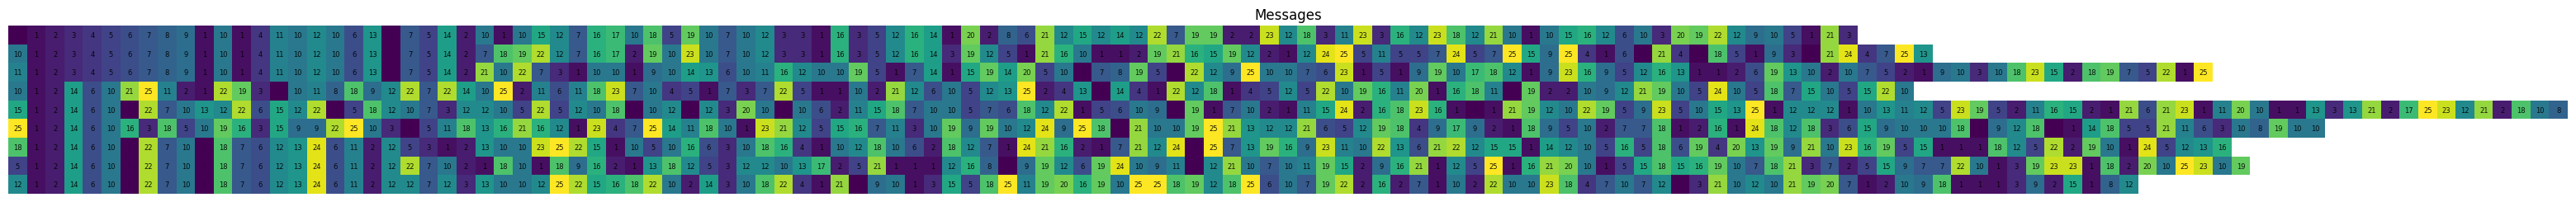

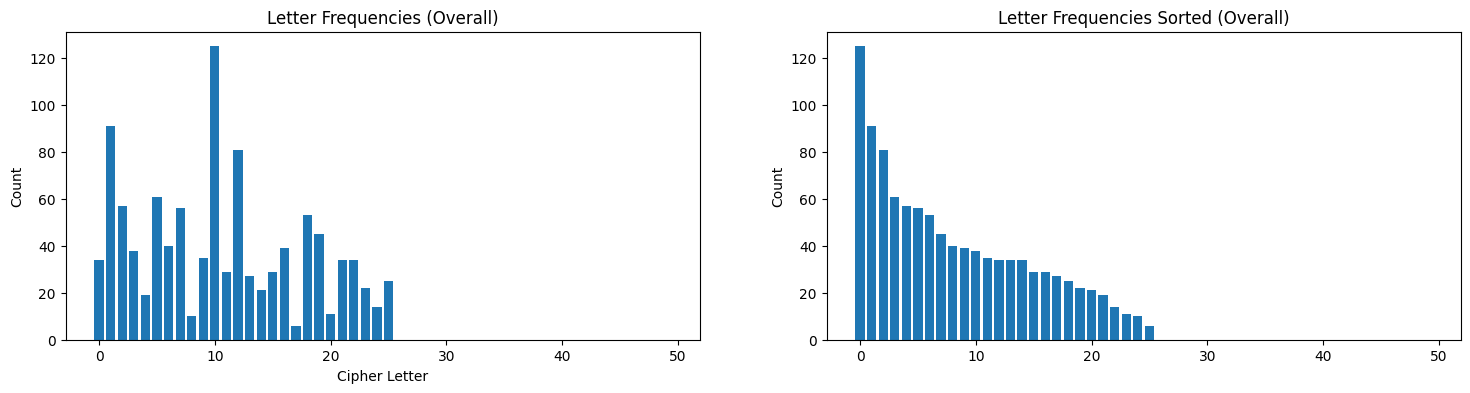

Letter Frequencies (Per message)
--------------------------------


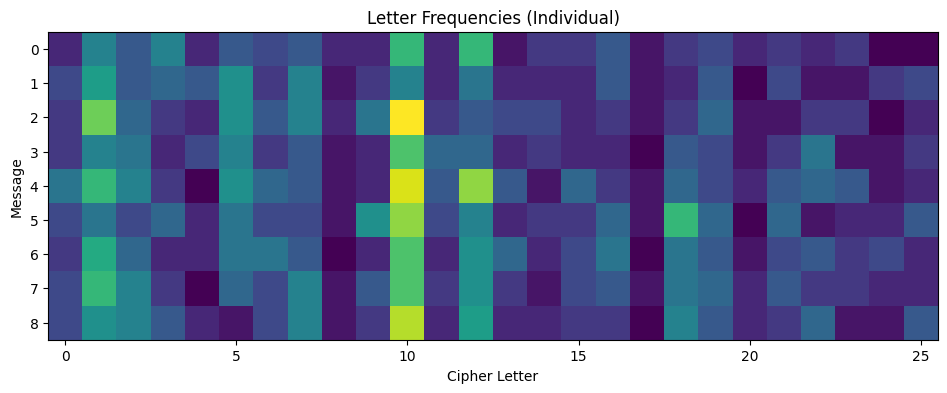

In [35]:
crypto.print_msgs_ascii(eyeMessagesPosition3D1Unique, 65)
print("")
crypto.full_overview(eyeMessagesPosition3D1Unique)

Kappa Auto-Correlation Test
---------------------------


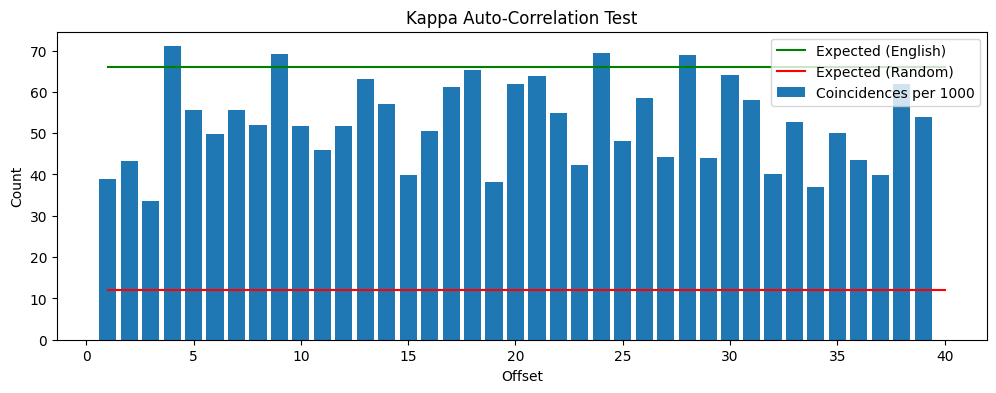


Kappa Periodic Test
-------------------


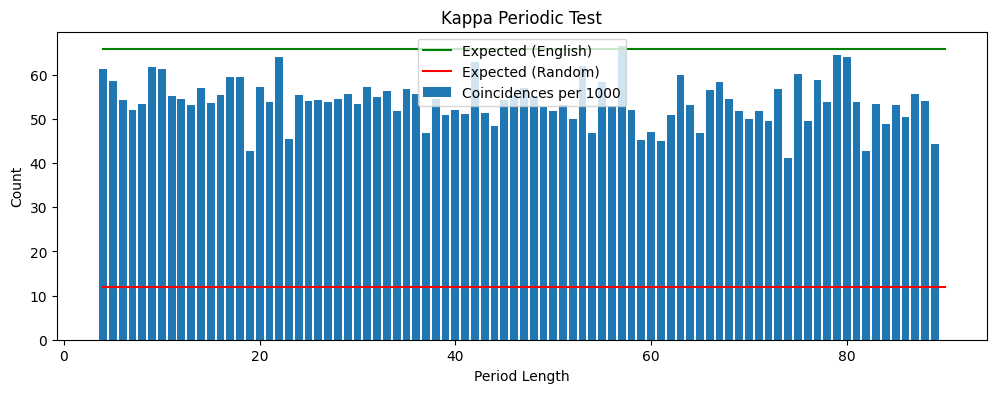

In [36]:
crypto.plot_msgs_kappa_auto(eyeMessagesPosition3D1Unique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesPosition3D1Unique)

# Variant: Positionless 3d 2

---

In [37]:
def conv_eye_to_dir3D2(e, i):
  if i == 0:
    if e == '0': return ( 0,  0,  0)
    if e == '1': return ( 0,  0,  1)
    if e == '2': return ( 0,  1,  0)
    if e == '3': return ( 0,  0, -1)
    if e == '4': return ( 0, -1,  0)
  elif i == 1:
    if e == '0': return ( 0,  0,  0)
    if e == '1': return ( 0,  0,  1)
    if e == '2': return ( 1,  0,  0)
    if e == '3': return ( 0,  0, -1)
    if e == '4': return (-1,  0,  0)
  elif i == 2:
    if e == '0': return ( 0,  0,  0)
    if e == '1': return ( 0,  1,  0)
    if e == '2': return ( 1,  0,  0)
    if e == '3': return ( 0, -1,  0)
    if e == '4': return (-1,  0,  0)

def conv_eye_to_pos3D2(tri):
  p1 = conv_eye_to_dir3D2(tri[0], 0)
  p2 = conv_eye_to_dir3D2(tri[1], 1)
  p3 = conv_eye_to_dir3D2(tri[2], 2)
  final = ( p1[0] + p2[0] + p3[0], p1[1] + p2[1] + p3[1], p1[2] + p2[2] + p3[2] )
  return "(" + str(final[0]) + "," + str(final[1]) + "," + str(final[2]) + ")"

eyeMessagesPosition3D2 = [ [ conv_eye_to_pos3D2(tri) for tri in msg ] for msg in eyeutil.msgs_eye_triflat ]
UID = crypto.UID()
eyeMessagesPosition3D2Unique = [ [ UID.get_uid(pos) for pos in msg ] for msg in eyeMessagesPosition3D2 ]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

ABCDEFGHIJKLBEMNAOGPKHFQANKNKALRNNSTUNLLCVDKRDFCRQAWCIXXYZ[QA\LU]CCV^\_`V_R^VSAXNALKRAGTVW]a[bOFAXD
NBCDEFGHIJKLBEMNAOGPKHFQAH\]\ALRNCULVNLLCVDKRDFCRQVUYcAXROAAA]VdZU[CAAGYcbFcLGFHYZbeEKGKVEK\TAfVKXGEHeP
bBCDEFGHIJKLBEMNAOGPKHFQAgT\HDBNNAbNQPXT`RCNNUFAHQAKUQWFTKHIUcK\AJeLLLGVBcKf]NN\AAbVdbTAdPAKCXUPOCLHcCAJTVLSVKC\UHN\he
TBCQGLgYMAK\UDANMIUJCaLaQLeCbG`UVHOEFKHVH\NKKNCX^XNcCPeCEPKQEA\A\BEFCc\LUdMWAdiMAUACOfCXUTTGNciHKNNK\T
KBCQGLK\HNPC\GZ^\KTiCNH_YANF\FANiANCKYDWTKNGA`Z\LONTHGUC\KFXNbKUCHLAC`KGCRiVRAKBV]^Ta]TfVFNKPYAYAAKNPbCcVUcCbRKAAgGXVC`WNACPVPgANYV^VCiOI
eBCQGLd_\FOURDZbf\eO_KcM\PRXRAKVEHYQMSTCVXCcZRLMVT]fUOAGbeSKgLOUYXPCCXGF[]iEfNfChUfFNCHL\ACRKG\^\DXZJNNNiAJC\KBQSNcVbG_LI]LL
iBCQGLK\HNKUHGYPGXbCCcVhAPOTVe\KCNcLRGDLUREANCSLGC\CHCGgRChHVCGAeHPURbV`N\PGX\YZKKQ[NTRciXUEWPUbgNVdUFZKhA\CT\CUNBGcYPR
cBCQGLK\HNKUHGYPGXbCC\LNAAUTKibRABPiCc_ACNPNCTXBAhAdIAb]^GUGLb`A^VNLOMUKCfRXBCNeBdVWLhc

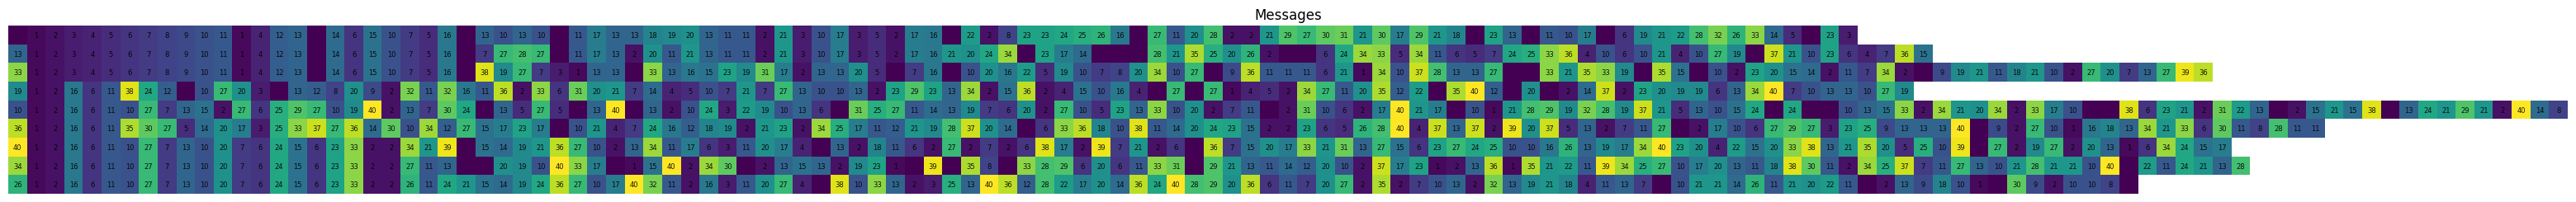

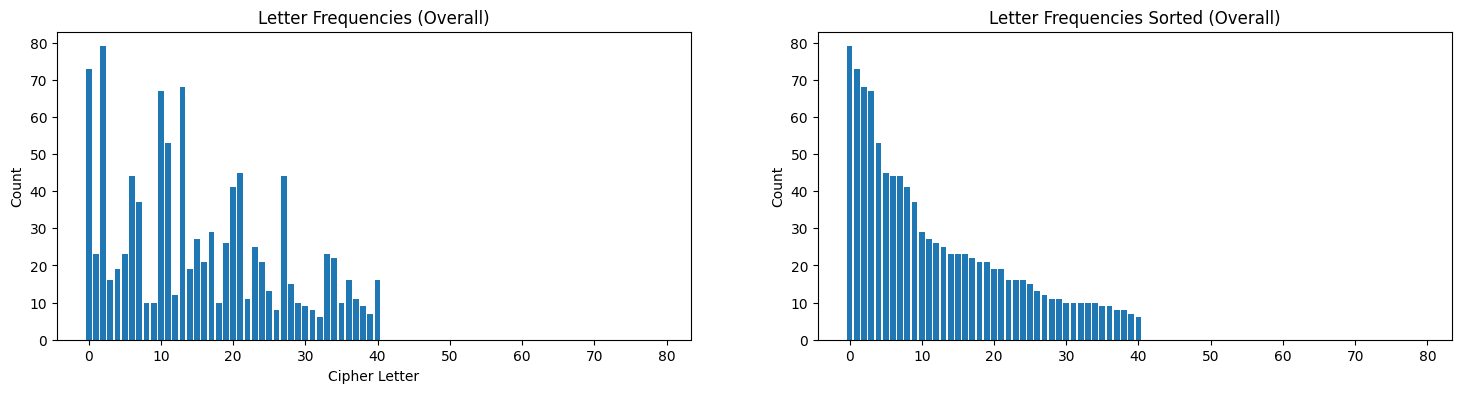

Letter Frequencies (Per message)
--------------------------------


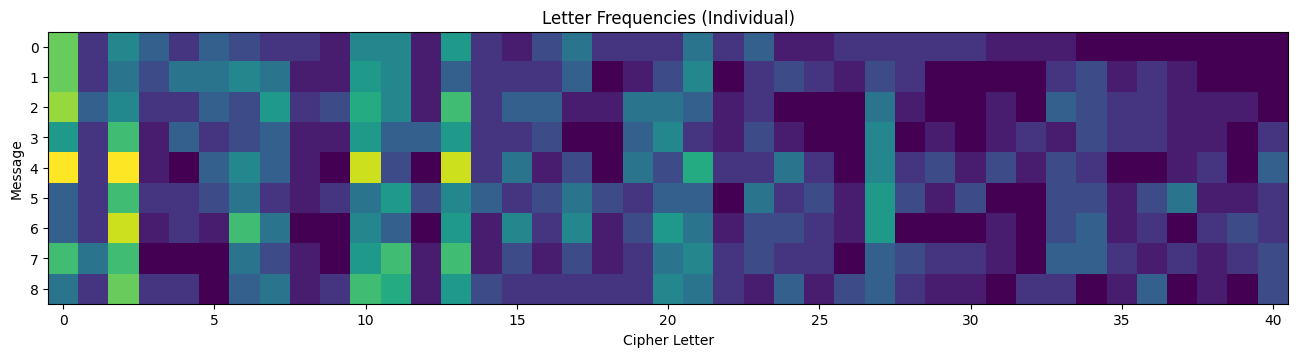

In [38]:
crypto.print_msgs_ascii(eyeMessagesPosition3D2Unique, 65)
print("")
crypto.full_overview(eyeMessagesPosition3D2Unique)

Kappa Auto-Correlation Test
---------------------------


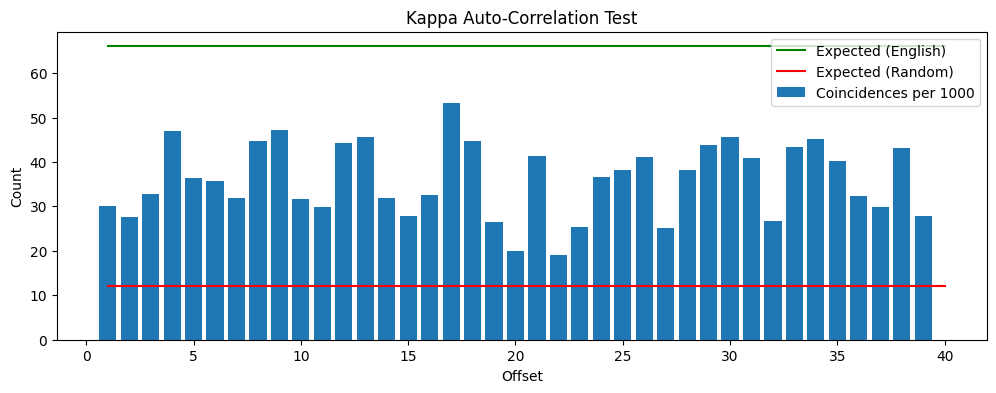


Kappa Periodic Test
-------------------


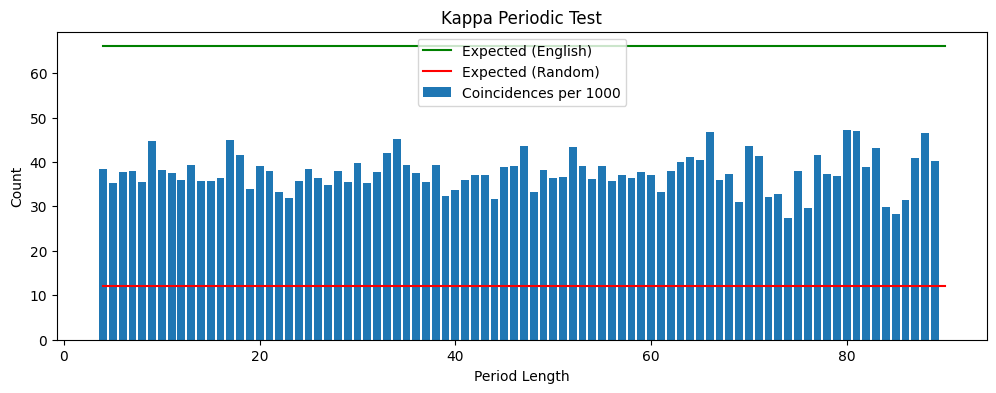

In [39]:
crypto.plot_msgs_kappa_auto(eyeMessagesPosition3D2Unique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesPosition3D2Unique)

# Variant: Positionless 3d 3

---

In [42]:
def conv_eye_to_dir3D3(e, i):
  if i == 0:
    if e == '0': return ( 1,  0,  0)
    if e == '1': return ( 0,  0,  1)
    if e == '2': return ( 0,  1,  0)
    if e == '3': return ( 0,  0, -1)
    if e == '4': return ( 0, -1,  0)
  elif i == 1:
    if e == '0': return ( 0,  1,  0)
    if e == '1': return ( 0,  0,  1)
    if e == '2': return ( 1,  0,  0)
    if e == '3': return ( 0,  0, -1)
    if e == '4': return (-1,  0,  0)
  elif i == 2:
    if e == '0': return ( 0,  0,  1)
    if e == '1': return ( 0,  1,  0)
    if e == '2': return ( 1,  0,  0)
    if e == '3': return ( 0, -1,  0)
    if e == '4': return (-1,  0,  0)

def conv_eye_to_pos3D3(tri):
  p1 = conv_eye_to_dir3D3(tri[0], 0)
  p2 = conv_eye_to_dir3D3(tri[1], 1)
  p3 = conv_eye_to_dir3D3(tri[2], 2)
  final = ( p1[0] + p2[0] + p3[0], p1[1] + p2[1] + p3[1], p1[2] + p2[2] + p3[2] )
  return "(" + str(final[0]) + "," + str(final[1]) + "," + str(final[2]) + ")"

eyeMessagesPosition3D3 = [ [ conv_eye_to_pos3D3(tri) for tri in msg ] for msg in eyeutil.msgs_eye_triflat ]
UID = crypto.UID()
eyeMessagesPosition3D3Unique = [ [ UID.get_uid(pos) for pos in msg ] for msg in eyeMessagesPosition3D3 ]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

ABCDEFGHIJKHBECKGLKMEHFNJOKOKGGMPOQGAKGHOIDKMDFOMNGRCIKSHTUNGPGAVCROWEXAGXMWGQGSOGWKYGKTIRVZUPOFGSD
OBCDEFGHIJKHBECKGLKMEHFNJHEVJGGMPRAWOKGHOIDKMDFOMNIAHTGSYOGGJVISTPURGGMH[PF[GMFOHTP\EKK]IEEEGG]I]SMEO\^
PBCDEFGHIJKHBECKGLKMEHFNJYBJODBOKGPONMKTAMOOOPFGHNGKPNRFT]\IAT]PGJ\WHGKGBTK]VKPEGGPOSPGGS^GKCKAMLCW\TRGJTIWQOKREA\GPL\
BBCNGWYHCJKPADAOCIRJOZGZNW\RPKAROOLEFKOIHPGKKOCSWKOTOM\RE^]NEGJGEBEFO[JHASCRGSCCAPJRL]OSABGMO[]\KKGKPT
KBCNGWEPHOMOPGTWPEG]OK\XHGOFPFGKCAOOEHDRBEOGJATEGLOG\GROPKFKKPEPOOHJOAKMRY]OMGEBIVWTZVG]OFKK^HGHGGKKMPO[GP[CPYKJGYKSGOARKGO^IMYJPHOWIRCLI
\BCNGWSXEFOAMDTP]P\OX][CE^MSMGKGEOHNCQBOGSO[TYGCITV]AOGMP\Q]YHLPHS^OOSKFUVCE]P]CLR]FOROGEGCYKMEWEDKTJOKKCAJOEEBNQG[IPGXWIVWH
PBCNGWEPHOEROKH^MKPCOTILJ^OBG\PKOO[WYGDWRMEGKOQHGCEO\OMYYRL\IOMA\\MAYPGAKP^GSPHTKKNUOGYT]KAERMAPYOGSAFTKLGEOGPRPOBMTHMM
TBCNGWEPHOEROKH^MKPCOPGOJGRTKCPMJB^PO[XGOKMPRGSBGLGSIAPVWGAMWPAAWIKGLCAKC]MSBOG\BSIRWLT

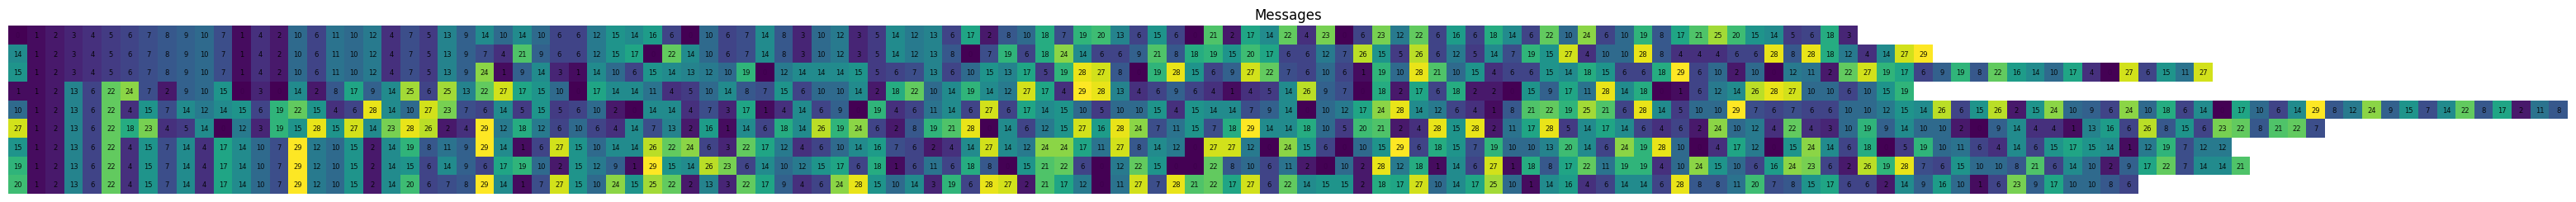

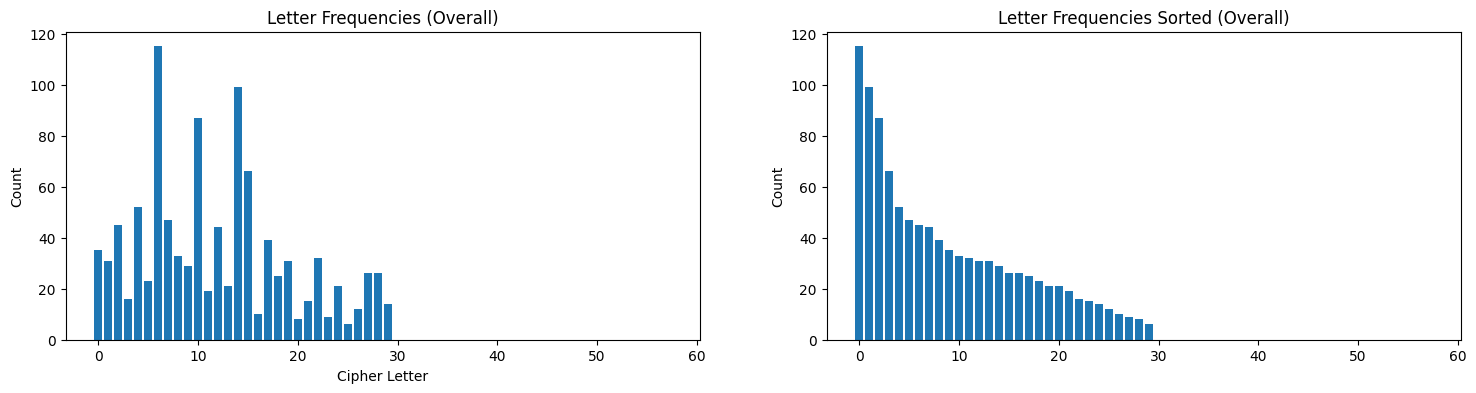

Letter Frequencies (Per message)
--------------------------------


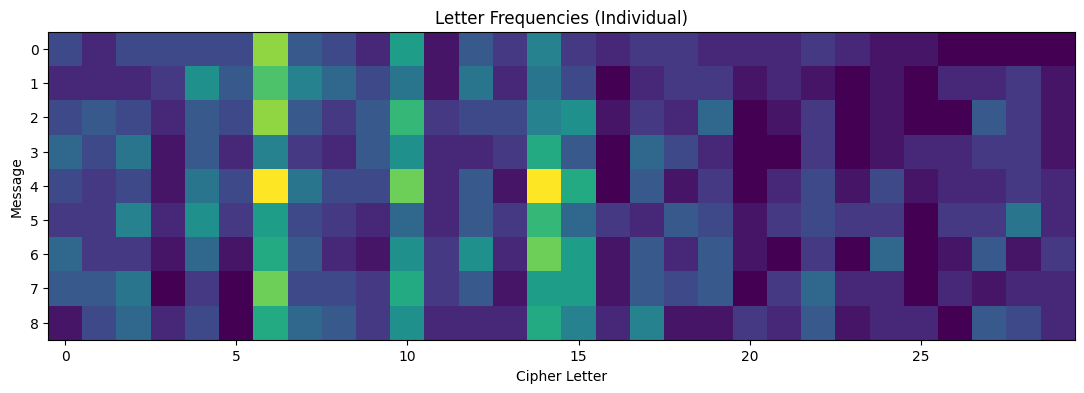

In [43]:
crypto.print_msgs_ascii(eyeMessagesPosition3D3Unique, 65)
print("")
crypto.full_overview(eyeMessagesPosition3D3Unique)

Kappa Auto-Correlation Test
---------------------------


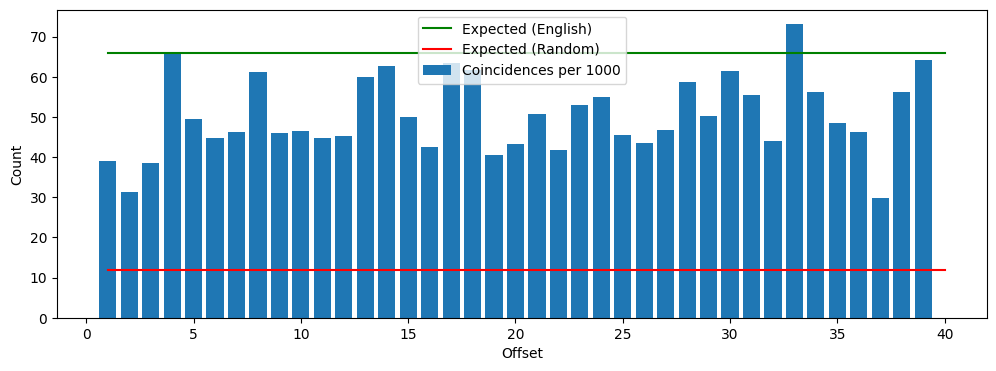


Kappa Periodic Test
-------------------


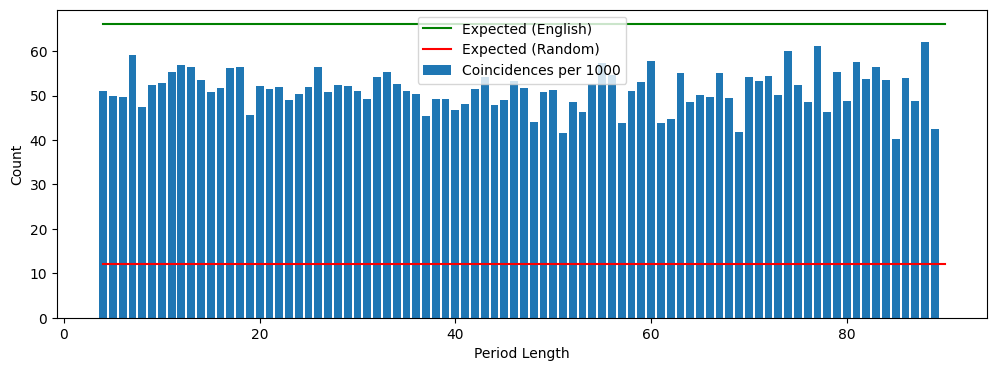

In [26]:
crypto.plot_msgs_kappa_auto(eyeMessagesPosition3D3Unique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesPosition3D3Unique)

# Variant: Mod 26

---

In [44]:
eyeMessagesModTri = [ [ tri % 26 for tri in msg ] for msg in eyeutil.msgs_eye_tri ]

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

8.%6*-7#8)02.*&.#(/ "#-7!"$.+#53 .9- .52526036-5374%%8#1'/'7/(5 $%943+6$$633$9/1"4"+!#/02%$,'%"-,16
".%6*-7#8)02.*&.#(/ "#-7!#+$ #53 9 "4.52526036-5372 '9,1!"4,!$57/&'9,#041*-150-)4/%(*$/*5*"+-4+2*10*)(2
*.%6*-7#8)02.*&.#(/ "#-7!18 )6."6,%.7 #0$35."&-,#7,+&7%-0*38 9*(#)("25/$.90+$6 +/4%47%-/7240%#  (%"399,)02"94+9+ 3!(,(
8.%77"14&!0( 68"&8#)5,5,7"(9*/$#4)(*-$)2#(!$0"%13#"95 (9*2*7*, #+.*-51 2 7&%,7)&8&!9(+51 8-0"1'3+.!+(0
+.%77""(#. 5(7/3("-'5.36'/"-(-#6)8.-"'6%8""7!$/+5(.-37#-(0-#6%"&&)2!&$+09!'43,".5$30,$-+4-6+24,'/#$6 *51$&1%*!+!,1/1$&$%.,&22 1! 44359)(8
(.%77"76+-" 36/%+(("6*1&+2313#0$*)47&98&$151/!5&20$+ "/0%(9*12(&412-51/-'$)*+ +%,#+-.9)5+,%!00+3+6#/).6.)8)-+".79!15*76"8$"2
!.%77""(#."#)/'20#*%592,!2"8$((+&"1"!76"#3*,.5927%+53&01!9,35508(3  !%$$6(271('/+07'.-!9'# *%  %1.$7 -/0,4+--(9&"

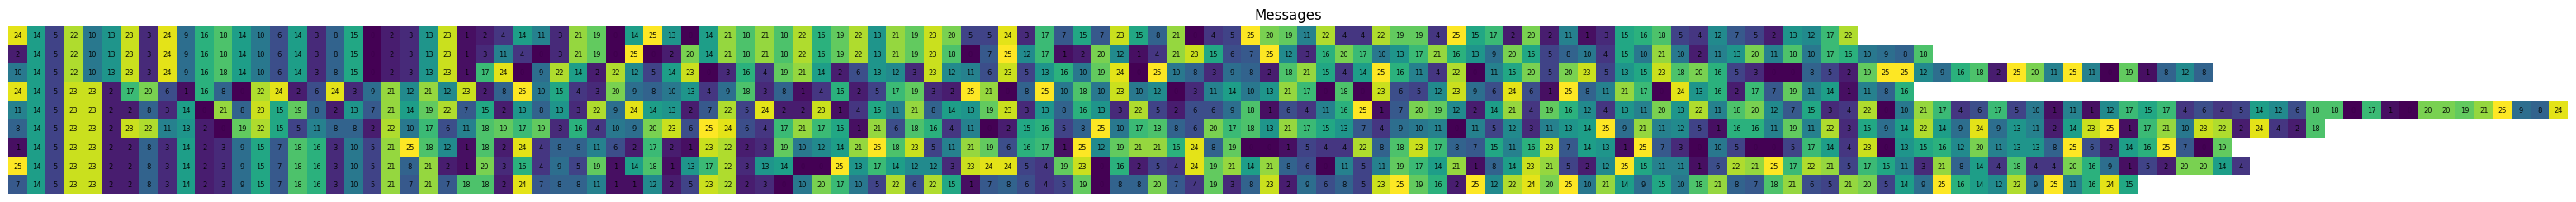

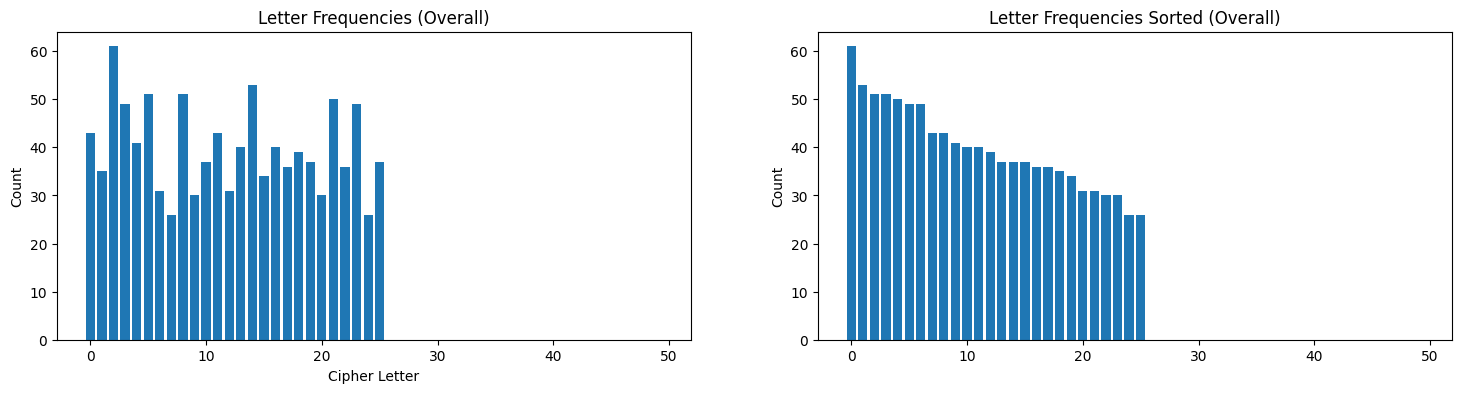

Letter Frequencies (Per message)
--------------------------------


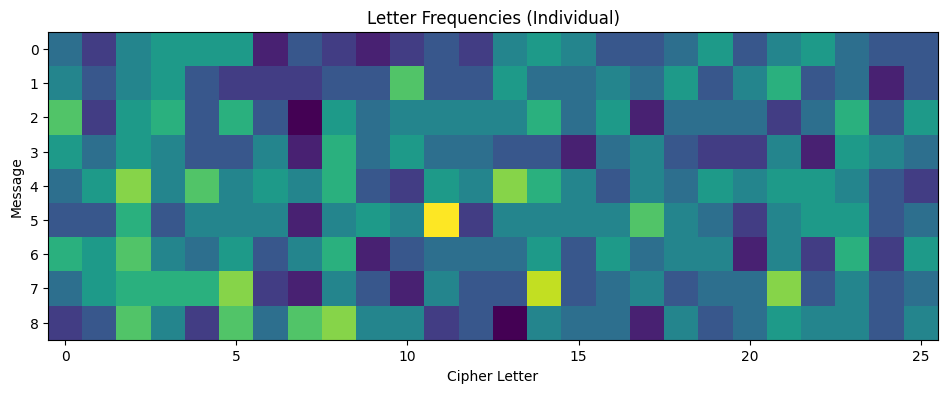

In [45]:
# Show matching sections between basic trigrams
crypto.full_overview(eyeMessagesModTri)

Kappa Auto-Correlation Test
---------------------------


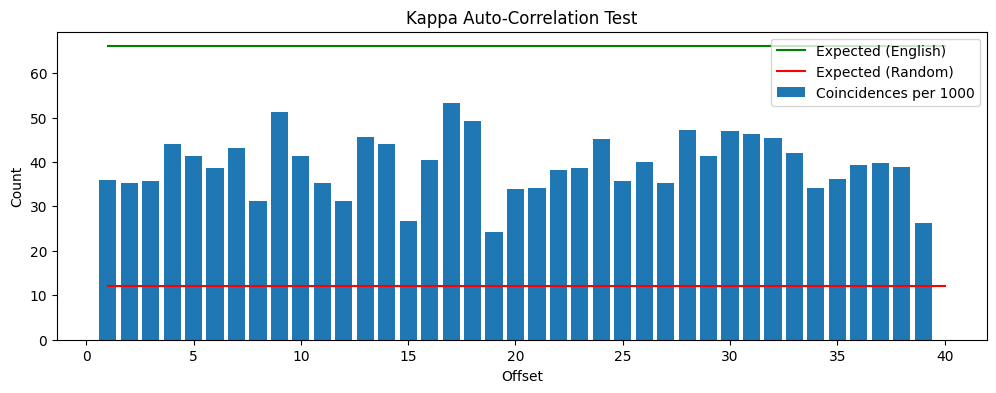


Kappa Periodic Test
-------------------


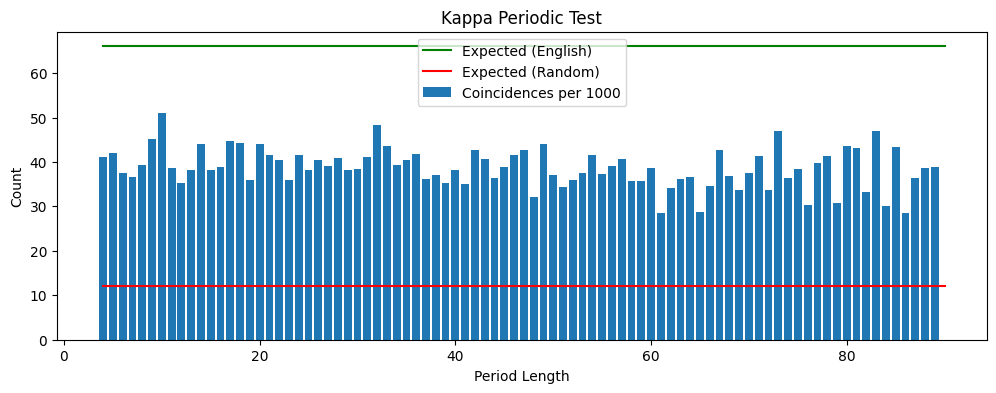

In [46]:
crypto.plot_msgs_kappa_auto(eyeMessagesModTri)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesModTri)

# Variant: Seperate
---

In [47]:
each = []
for i in range(9):
  each.append([])
  for e in eyeutil.msgs_eye_triflat[i]:
    each[i] += list(e)


ml = max([ len(m) for m in each ])
lists = []
for i in range(5):
  lists.append([0] * ml)
for msg in each:
  for i in range(len(msg)):
    v = int(msg[i])
    lists[v][i] += 1

for l in lists:
  print(l)

[0, 4, 2, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 6, 6, 3, 6, 0, 5, 7, 3, 0, 3, 4, 4, 4, 0, 2, 1, 4, 3, 5, 0, 0, 1, 7, 4, 1, 1, 3, 1, 4, 0, 1, 1, 6, 0, 1, 0, 0, 1, 8, 4, 1, 3, 0, 5, 4, 4, 3, 3, 3, 0, 3, 4, 2, 7, 0, 1, 1, 0, 1, 6, 5, 0, 3, 2, 1, 2, 3, 2, 2, 4, 3, 3, 2, 1, 2, 0, 2, 2, 0, 2, 5, 1, 2, 5, 4, 4, 2, 3, 4, 4, 2, 1, 0, 4, 2, 4, 3, 2, 3, 3, 1, 4, 2, 0, 1, 2, 2, 1, 3, 2, 4, 2, 1, 0, 2, 1, 2, 2, 3, 4, 2, 2, 2, 1, 3, 5, 1, 1, 2, 0, 1, 3, 2, 1, 4, 1, 1, 1, 0, 3, 1, 3, 1, 4, 1, 3, 1, 5, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 4, 1, 2, 2, 3, 0, 0, 1, 3, 5, 2, 1, 3, 3, 4, 1, 0, 1, 3, 0, 3, 2, 2, 2, 4, 5, 3, 1, 2, 1, 4, 0, 0, 4, 3, 2, 2, 1, 2, 5, 3, 3, 2, 2, 2, 5, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 3, 3, 4, 3, 4, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 3, 3, 2, 5, 4, 1, 1, 5, 1, 1, 4, 2, 1, 3, 3, 3, 3, 1, 0, 4, 0, 3, 3, 2, 0, 2, 4, 1, 1, 1, 1, 4, 0, 1, 3, 0, 2, 4, 4, 1, 3, 0, 1, 2, 3, 2, 2, 1, 3, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 3, 2, 4, 2, 1, 2, 3, 

In [50]:
print(lists)

[[0, 4, 2, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0, 6, 6, 3, 6, 0, 5, 7, 3, 0, 3, 4, 4, 4, 0, 2, 1, 4, 3, 5, 0, 0, 1, 7, 4, 1, 1, 3, 1, 4, 0, 1, 1, 6, 0, 1, 0, 0, 1, 8, 4, 1, 3, 0, 5, 4, 4, 3, 3, 3, 0, 3, 4, 2, 7, 0, 1, 1, 0, 1, 6, 5, 0, 3, 2, 1, 2, 3, 2, 2, 4, 3, 3, 2, 1, 2, 0, 2, 2, 0, 2, 5, 1, 2, 5, 4, 4, 2, 3, 4, 4, 2, 1, 0, 4, 2, 4, 3, 2, 3, 3, 1, 4, 2, 0, 1, 2, 2, 1, 3, 2, 4, 2, 1, 0, 2, 1, 2, 2, 3, 4, 2, 2, 2, 1, 3, 5, 1, 1, 2, 0, 1, 3, 2, 1, 4, 1, 1, 1, 0, 3, 1, 3, 1, 4, 1, 3, 1, 5, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 3, 3, 2, 3, 2, 4, 1, 2, 2, 3, 0, 0, 1, 3, 5, 2, 1, 3, 3, 4, 1, 0, 1, 3, 0, 3, 2, 2, 2, 4, 5, 3, 1, 2, 1, 4, 0, 0, 4, 3, 2, 2, 1, 2, 5, 3, 3, 2, 2, 2, 5, 1, 2, 2, 1, 3, 3, 1, 1, 3, 2, 3, 3, 4, 3, 4, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 3, 3, 2, 5, 4, 1, 1, 5, 1, 1, 4, 2, 1, 3, 3, 3, 3, 1, 0, 4, 0, 3, 3, 2, 0, 2, 4, 1, 1, 1, 1, 4, 0, 1, 3, 0, 2, 4, 4, 1, 3, 0, 1, 2, 3, 2, 2, 1, 3, 2, 1, 0, 3, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 3, 2, 4, 2, 1, 2, 3,

In [51]:
ml // (39)

10

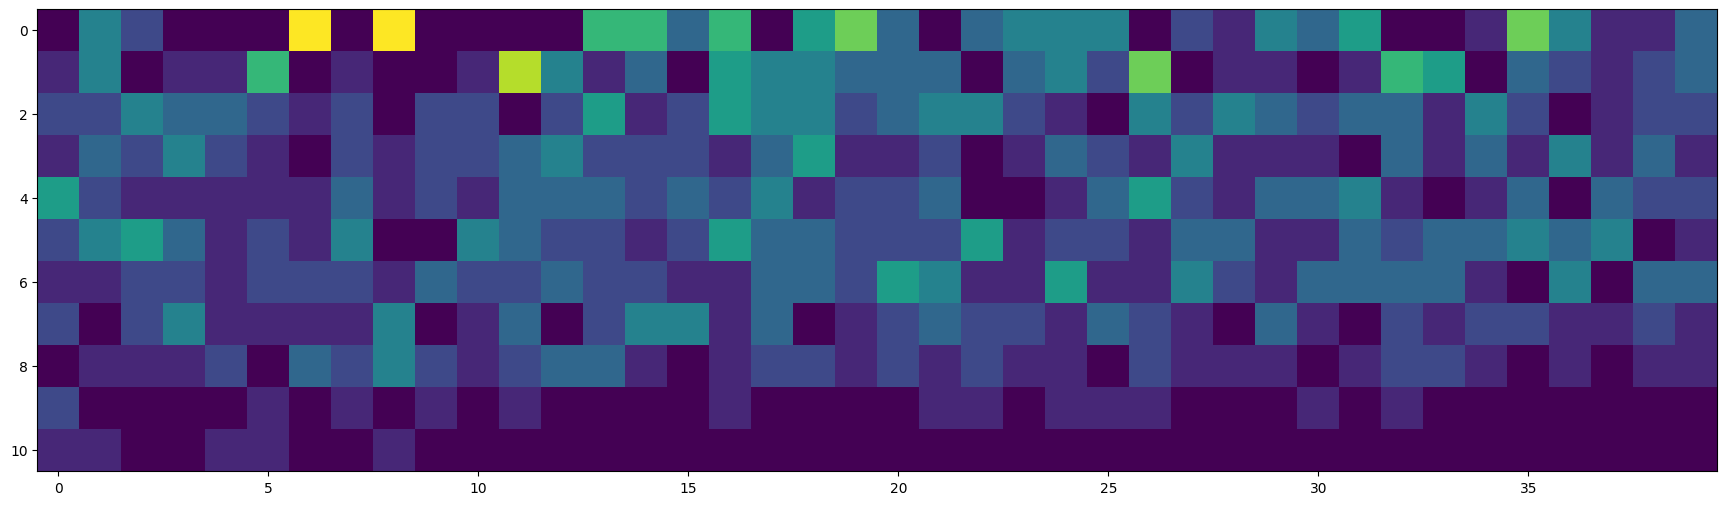

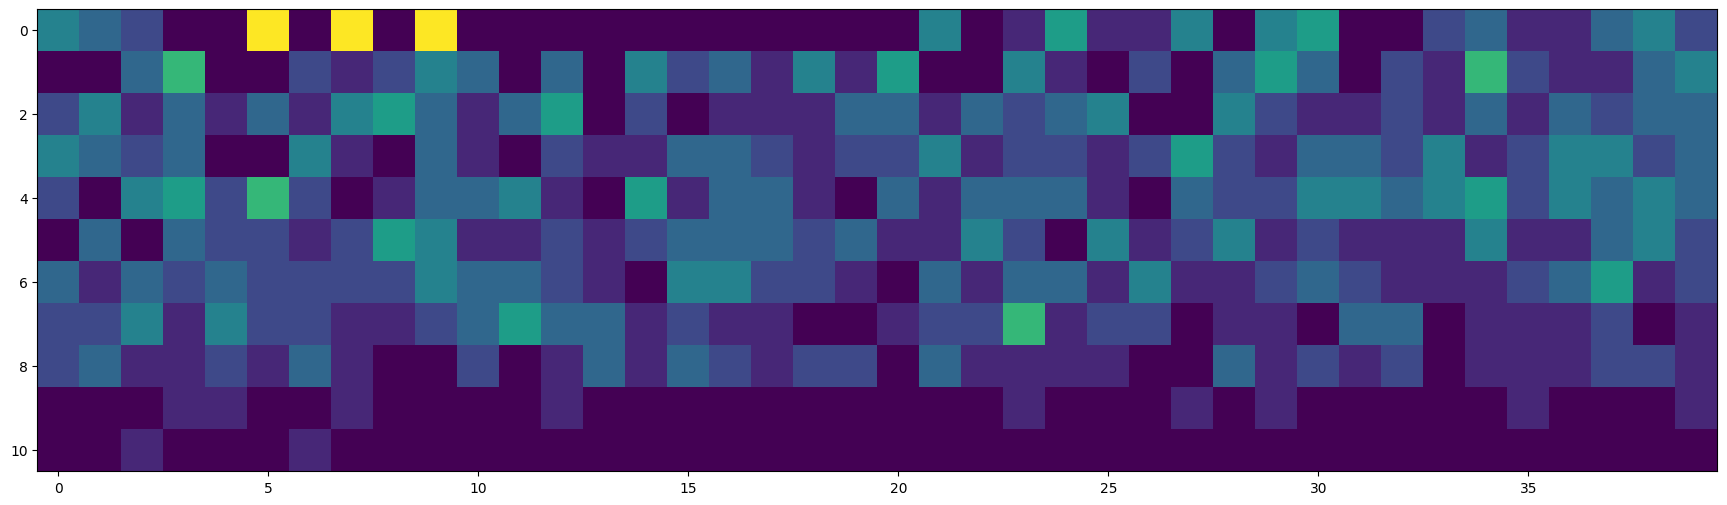

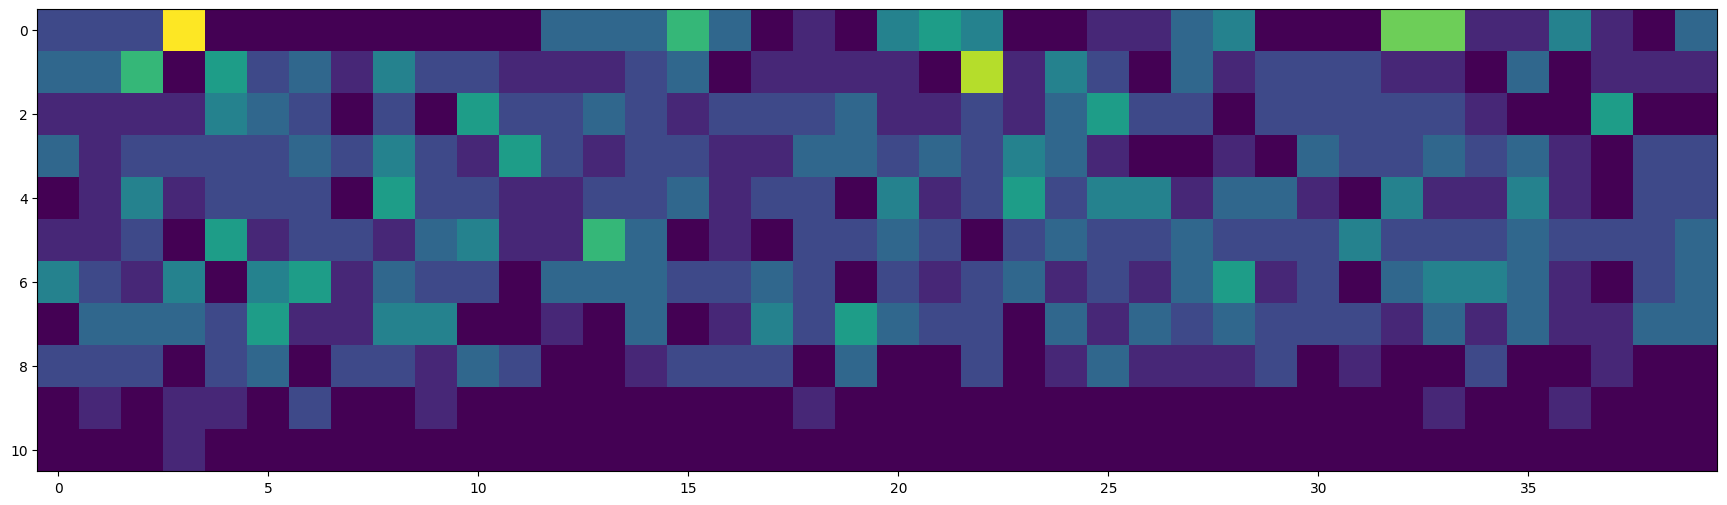

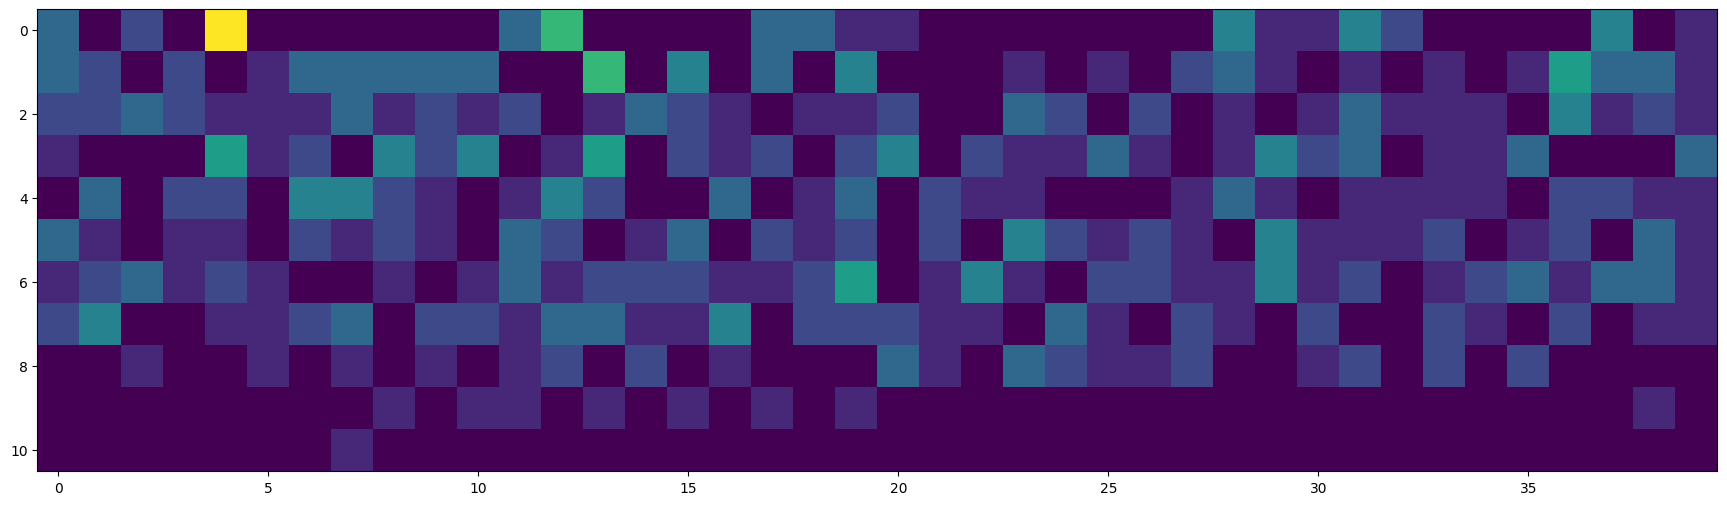

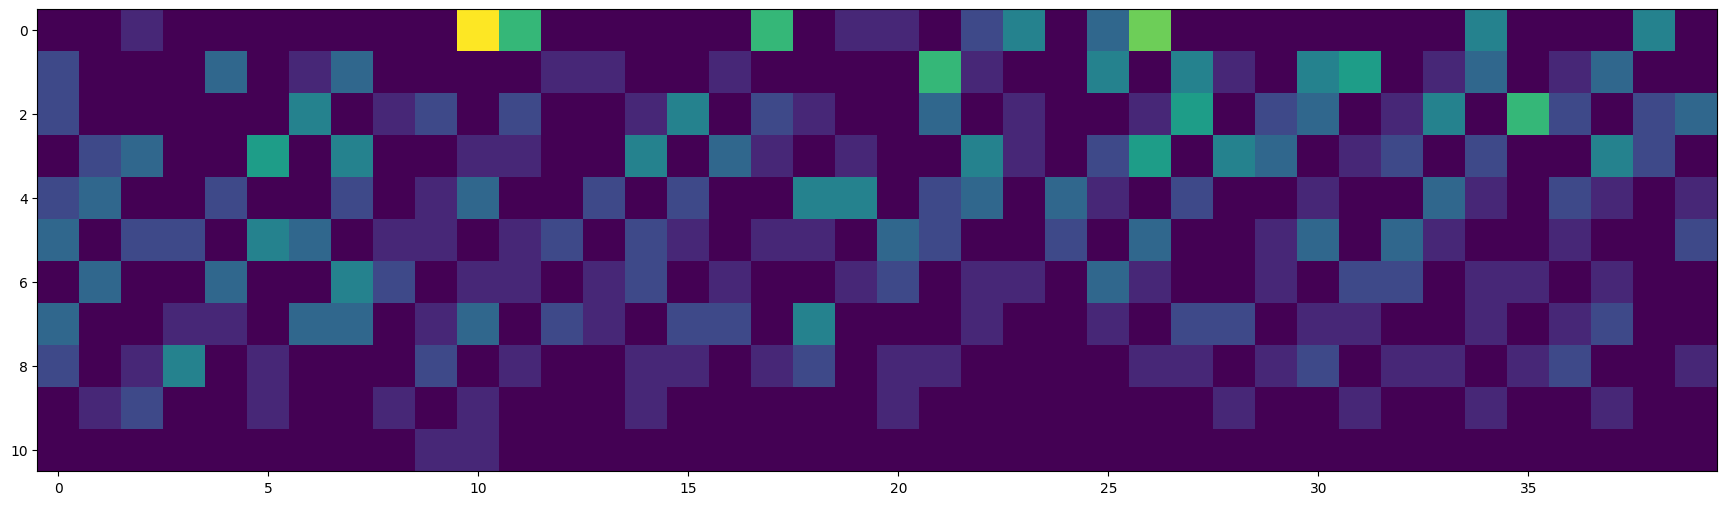

In [54]:
width = 40

for i in range(len(lists)):

  im = np.zeros((ml // width + 1, width), 'i4')
  for x, l in enumerate(lists[i]):
    im[x // width, x % width] = l

  ax = plt.figure(0, (24, 6)).subplots()
  ax.imshow(im, interpolation='nearest')
  plt.show()

# Variant: Added

---

In [55]:
directions = []
for msg in eyeutil.msgs_eye_triflat:
  x, y, z = 0, 0, 0
  for tri in msg:
    for i in range(3):
      v = int(tri[i])
      if v == 0: z += 1
      elif v == 1: y += 1
      elif v == 2: x += 1
      elif v == 3: y -= 1
      elif v == 4: x -= 1
  print(x, y, z)

9 26 70
27 16 70
31 30 93
44 33 75
46 24 111
37 36 85
39 3 93
33 32 93
27 49 84


# Variant: New

---

In [56]:
import string

len(string.ascii_lowercase)

26

In [57]:
newEyes = [ [ string.ascii_lowercase[(int(e[1]) * 1 + int(e[0]) * 5 + int(e[2]) * 5 + 2) % 26] for e in msg ] for msg in eyeutil.msgs_eye_triflat ]

print("".join(newEyes[0]))


e = "320"
t = (int(e[1]) * 1 + int(e[0]) * 5 + int(e[2]) * 5)
print(e, t)

# y x z
# 5*(Y) + X + 25*(Z)

mudaytrbatuquysyxsfgmbtfhsckdxlzckrpmylqveauzatvzfandarzhzxfpolmidhgvjkswkzvwrpzsagdlxfkenioxxwtiza
320 17



# Variant: Mirrored

---

In [59]:
def mirrorVert(eye):
  if int(eye) == 1: return 3
  elif int(eye) == 3: return 1
  else: return eye

def mirrorHorz(eye):
  if int(eye) == 2: return 4
  elif int(eye) == 4: return 2
  else: return eye

def visualRotate(eye):
  if int(eye) == 1: return 3
  elif int(eye) == 2: return 4
  elif int(eye) == 3: return 1
  elif int(eye) == 4: return 2
  else: return eye

def mirrorEye(eyeFlat, variant):
  if variant == 1: return "".join([ str(mirrorVert(mirrorHorz(single))) for single in eyeFlat ])
  elif variant == 2: return "".join([ str(mirrorVert(single)) for single in eyeFlat ])
  elif variant == 3: return "".join([ str(mirrorHorz(single)) for single in eyeFlat ])
  elif variant == 4: return "".join([ str(visualRotate(single)) for single in eyeFlat ])
  elif variant == 5:
    mirrored = [ str(mirrorVert(single)) for single in eyeFlat ]
    return mirrored[1] + mirrored[0] + mirrored[2]
  elif variant == 6:
    mirrored = [ str(visualRotate(single)) for single in eyeFlat ]
    return mirrored[1] + mirrored[0] + mirrored[2]
  else: return None


eyeMessagesMirrored1Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 1) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesMirrored2Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 2) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesMirrored3Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 3) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesMirrored4Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 4) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesMirrored5Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 5) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]
eyeMessagesMirrored6Tri = [ [ eyeutil.conv_triflat_to_tri( mirrorEye(eye, 6) if i % 2 == 1 else eye ) for i, eye in enumerate(msg) ] for msg in eyeutil.msgs_eye_triflat ]


Base trigram
Letter Frequencies (Per message)
--------------------------------


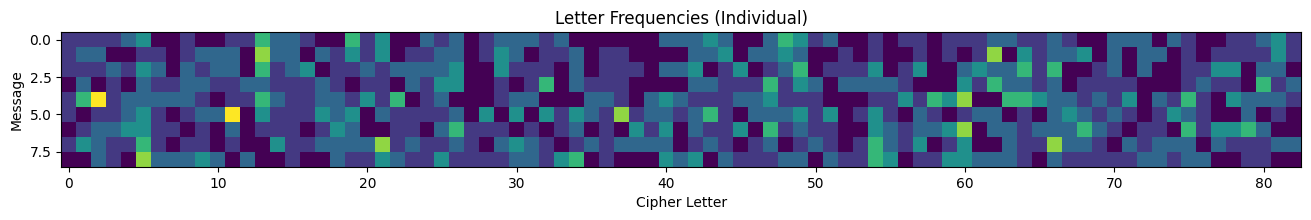


Mirror horz + vert
Letter Frequencies (Per message)
--------------------------------


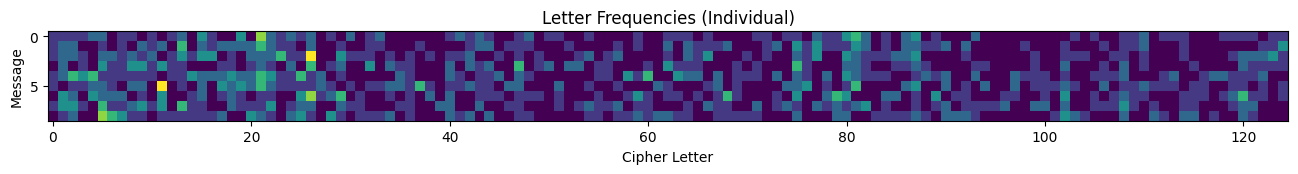


Mirror vert
Letter Frequencies (Per message)
--------------------------------


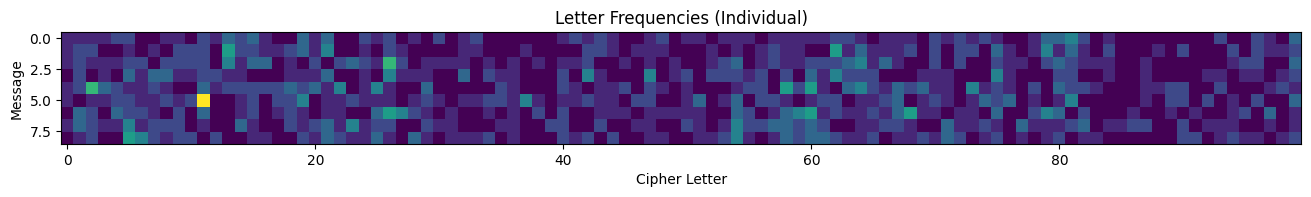


Mirror horz
Letter Frequencies (Per message)
--------------------------------


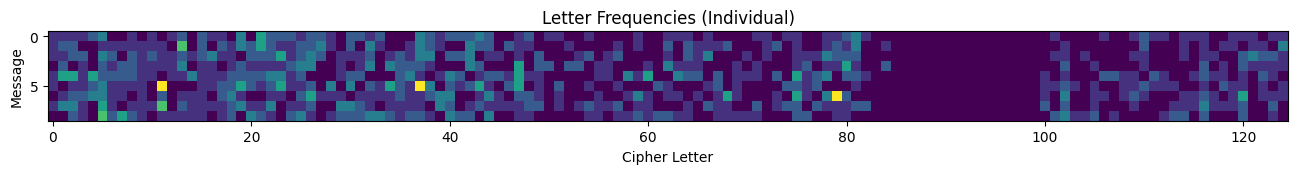


Rotate 180
Letter Frequencies (Per message)
--------------------------------


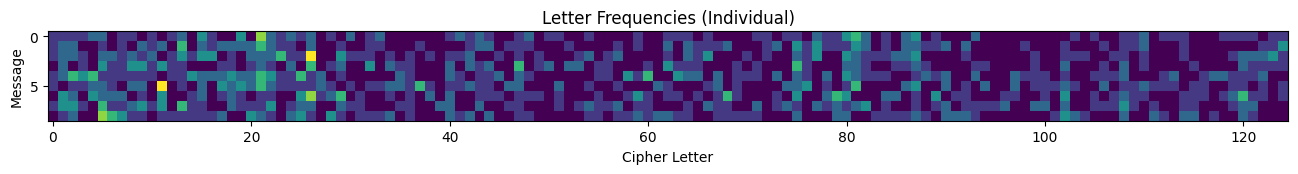


Vert + reorder
Letter Frequencies (Per message)
--------------------------------


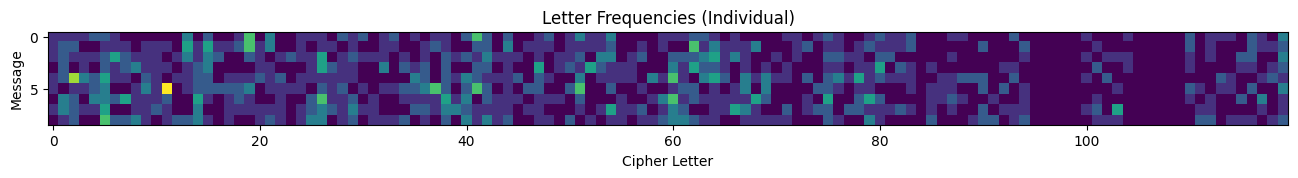


180 + reorder
Letter Frequencies (Per message)
--------------------------------


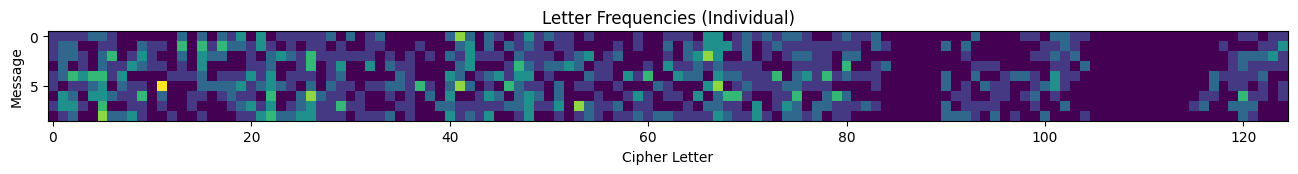

In [60]:
print("\nBase trigram")
crypto.plot_msgs_freq_individual(eyeutil.msgs_eye_tri)
print("\nMirror horz + vert")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored1Tri)
print("\nMirror vert")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored2Tri)
print("\nMirror horz")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored3Tri)
print("\nRotate 180")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored4Tri)
print("\nVert + reorder")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored5Tri)
print("\n180 + reorder")
crypto.plot_msgs_freq_individual(eyeMessagesMirrored6Tri)


180 Rot Overview
-----------------

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

RP%b^k18Jfb@ql/&"1-c!prH_s5; HSM:5fOJPL3b-e3ch}%T#I[QAcI52>k9Rgj$h3i$7IIpjVos/<L}>A<`IP
pP%b^k18Jfb@ql/&"1-c!1+zTs5; /:645fOJPL3b-e3cL2[)`Io0h!ziScnA/`sdd1-=5N-mNQY|^t/i"ajEJ*Id)|2
DP%b^k18Jfb@ql/&"1-c!Ol8)bbp6YHQ&#<X;OHpn-=c`&c?0MT:)*qB6fU/"b)J>V IjYR7aK7:hL%!:&(kVam/`0JV749:aUF|
lP%ck6ed@#J:bRp@TWO5Q6B/D9X4m(-t)J=UtJp%Ig!p)O&B/^:*c^Ts+P^O=Tf:S@}`SC~Rn!/(OI:(aNp='a_U\<
_P%ck6"=Hne\%ci\$aoOMh[Kp\qVC4H"P}l$p%!c5lHMM%W\L-!6"nZmf#Z_N9''R3"Pizg<,za462d`IsrVnO=$n1kD'_#`O/I$X}.Z:L&e# d4ii/Cl8
BP%ck67h+<23bcEB0j1~+:3I3sJ"^mNc@7l$IO=c'5~L<>:0INY|Sef(nNI2OI/AzCE EkFEH/)U+%'JN+i+b#Q]H6C4]+$bcS51gD%j68zVf
;P%ck6"=H")9[:d!DkO)L!:<($|\Zp16o%P6W;^.eSfkk+eMdOo/Faied4Ban2o$62%

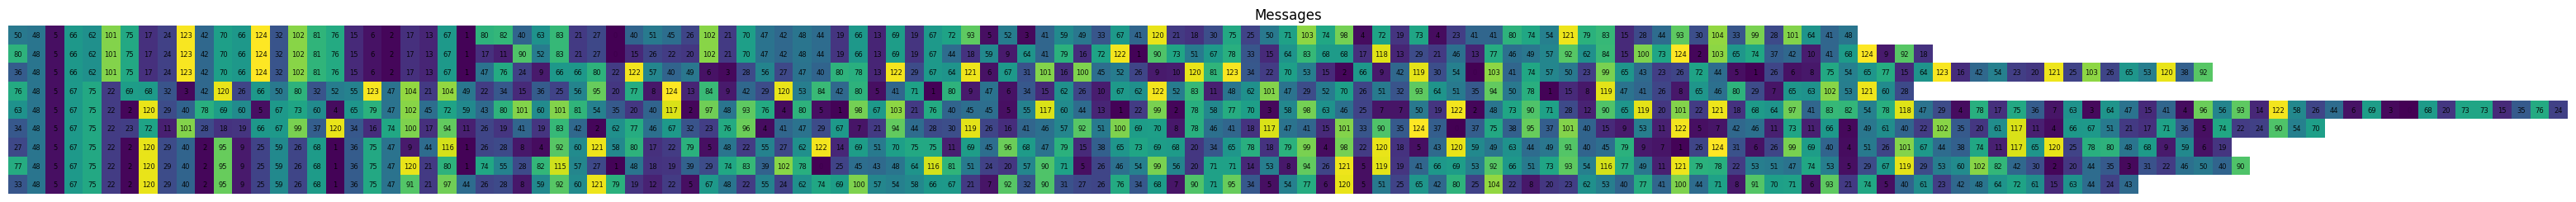

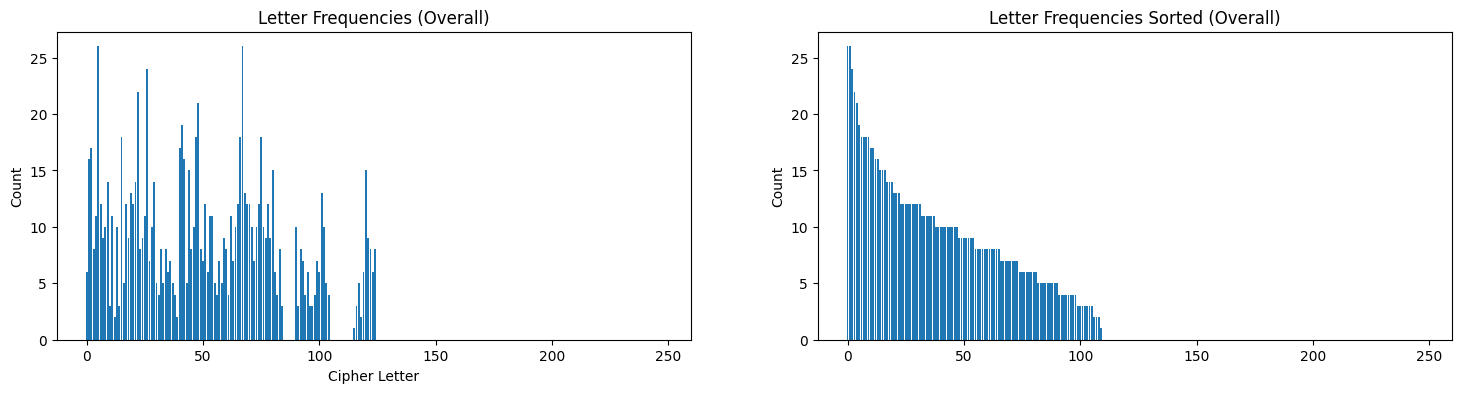

Letter Frequencies (Per message)
--------------------------------


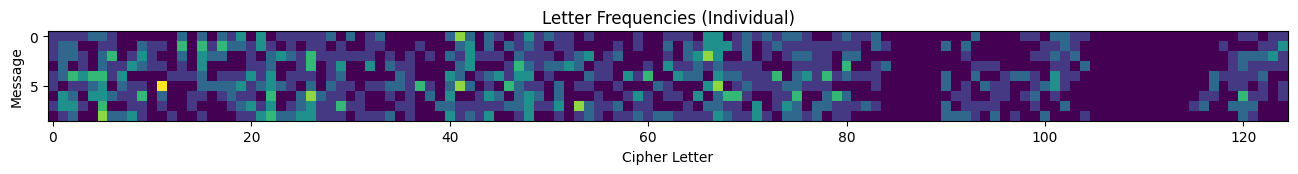

In [61]:
print("\n180 Rot Overview")
print("-----------------\n")
crypto.full_overview(eyeMessagesMirrored6Tri)

Kappa Auto-Correlation Test
---------------------------


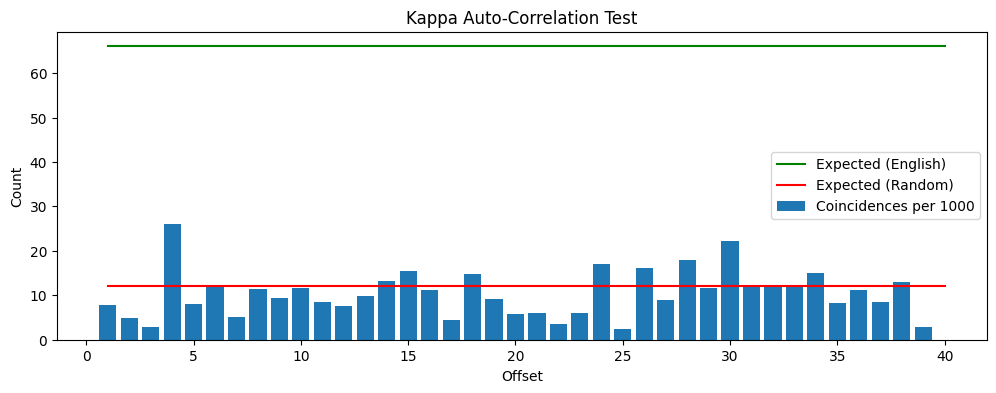


Kappa Periodic Test
-------------------


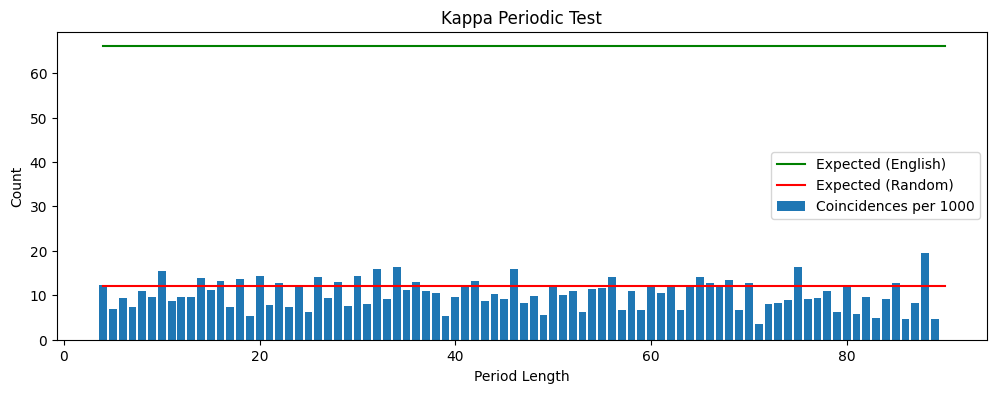

In [62]:
crypto.plot_msgs_kappa_auto(eyeMessagesMirrored6Tri)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesMirrored6Tri)

# Variant: Orderless

---

In [63]:
UID = crypto.UID()
eyeMessagesOrderless = [ [ UID.get_uid("".join(sorted([ e for e in flat ]))) for flat in msg ] for msg in eyeutil.msgs_eye_triflat ]

In [64]:
for msg in eyeMessagesOrderless:
  msgUnique = set()
  for e in msg:
    msgUnique.add(e)
  print(len(msgUnique))

28
29
28
29
30
30
28
30
29


Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

ABCDEFGHIJBKBELKMNGOAHFPCNBNQMHRSNTFUKHKVDDBRDFVRPWXCIGYVQMPMZHUUCC[VT\L[\RV[TMYNWKQRMGNDXUZMJNFWYD
NBCDEFGHIJBKBELKMNGOAHFPCHTUZMHRSCUK[KHKVDDBRDFVRPDUVFWYRNWWCU]RQUMCWM^_FLFFH^FH_QJ_EBGA]EATFWJDAY^EH_O
LBCDEFGHIJBKBELKMNGOAHFPC]NZHDBNKWJNPOGNLRVNNUFWHPWQUPXFNAHIUFAZMJ_KKHG[BFBJUKSTMWJ[RJFMROWBCGUONCKHFCWJNDKT[QCTUHFZB_
NBCPGK]_LCBZUDANLITJVZHZPK_CLGLT[HNEFBHDHZFBBNCYVGNFVO_CEOAPEWZMTBEFVFZKURLXWRTLAUCCNJVYUNF^NFTHQKFQZN
QBCPGKAZHNOVZGQVZAFTVKH\VMNFZFMKTANVAVDXNANGCLQTHNNFHGTVZBFGKJAUBHKCBLQ^CRT[RWAB]UVNZUFJ[FKQO_WVMMBKOLVF[UFCLRQCW]GY[BLXKWBODO]CS_[V]CTNI
_BCPGKR\TFNURDQJJZ_N\AFLTORYRMB[EH_PLTNB[YVFQRHLDNUJUNM^J_TA]KNU_YOVVYGFMUTEJSJCBTJFNCHHTWCRB^TVTDGQJNKKTAJVTABPTFF]LG\KIUKK
TBCPGKAZHNATHGVO^GLCVFDBCONN[_ZQBNFKRGDKTREWKVTKGCTVHB^]RCBH]V^A_HOURJ[LKZOGYZVQQBPMNFRFTGUEXOUJ]N[RUFQBBWTVFZCUNB^FVOR
FBCPGKAZHNATHGVO^GLCVZHNCWTNBTJRCBOTVF\MVKOSCFYBWBMRIAJUVGU^KJLAV]KHNLUQCJRYBVF_BR]XKBF

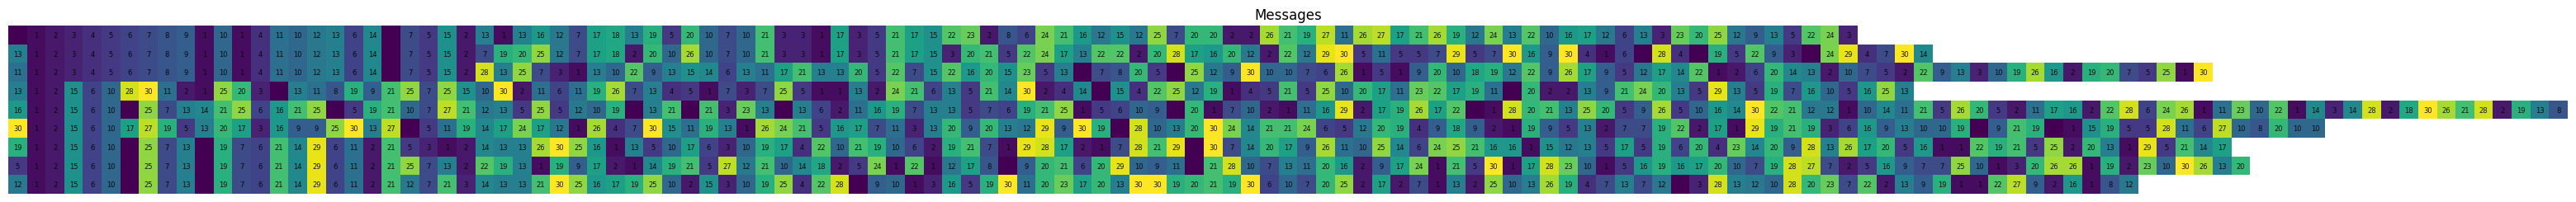

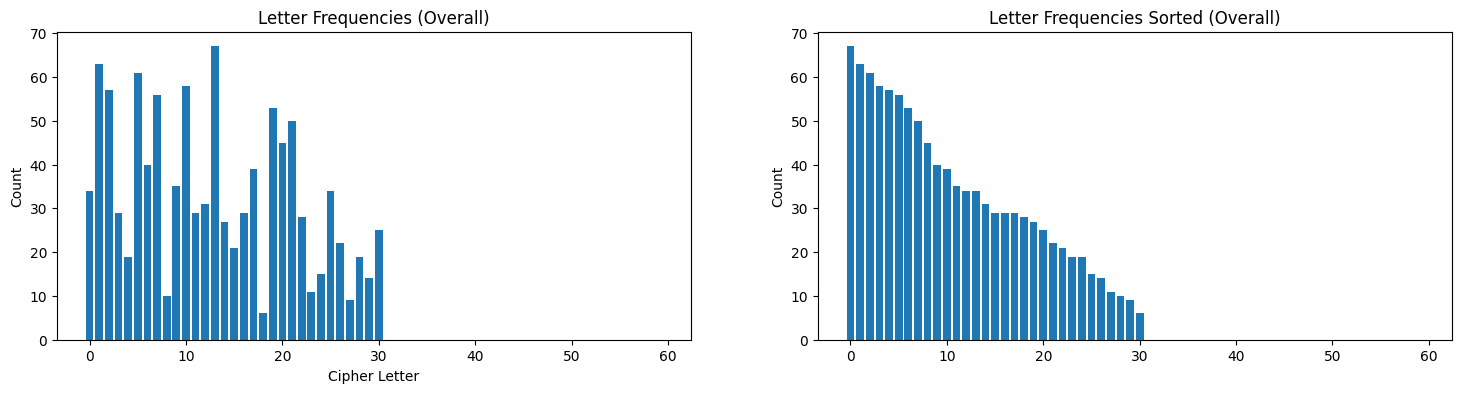

Letter Frequencies (Per message)
--------------------------------


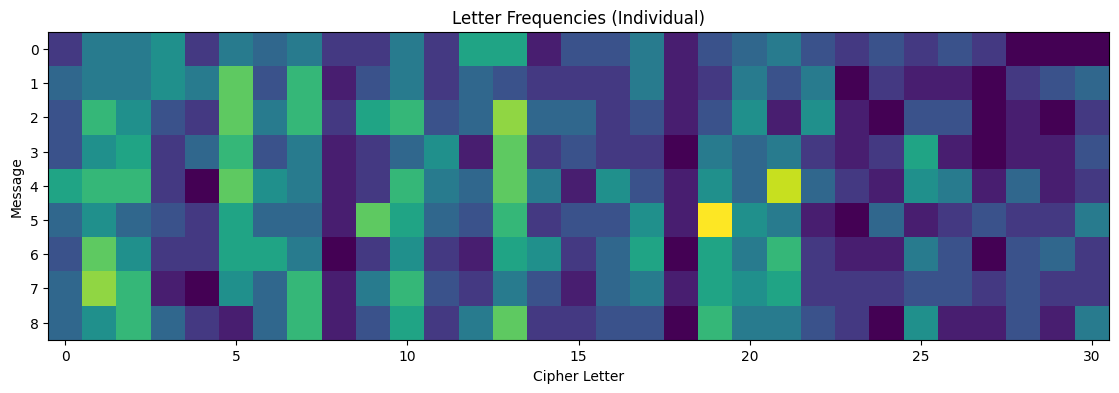

In [65]:
crypto.print_msgs_ascii(eyeMessagesOrderless, 65)
print("")
crypto.full_overview(eyeMessagesOrderless)

Kappa Auto-Correlation Test
---------------------------


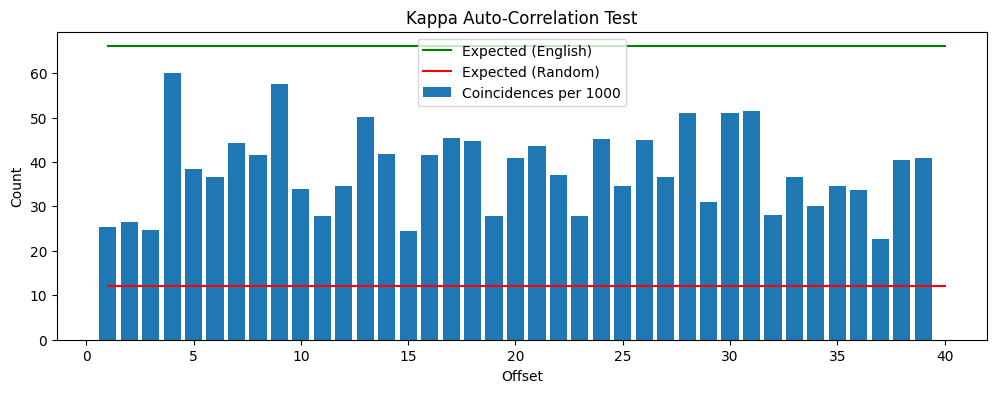


Kappa Periodic Test
-------------------


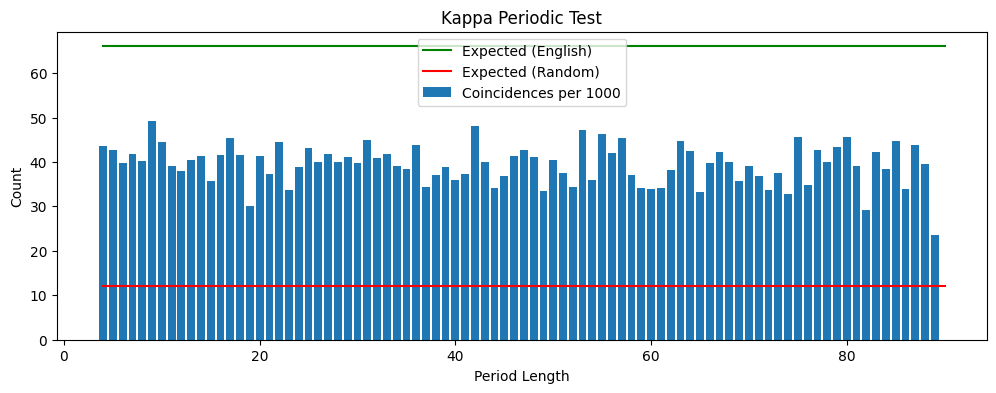

In [67]:
crypto.plot_msgs_kappa_auto(eyeMessagesOrderless)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesOrderless)

# Variant: Unrotated

---

In [68]:
# For each eye only unrotate
eyeMessagesUnrotated = [ [ eyeutil.conv_triflat_to_tri_unrotated(e) for e in msg ] for msg in eyeutil.msgs_eye_triflat ]

# For each eye unrotate and get crypto.UID
UID = crypto.UID()
eyeMessagesUnrotatedUnique = [ [ UID.get_uid(eyeutil.conv_triflat_to_tri_unrotated(e)) for e in msg ] for msg in eyeutil.msgs_eye_triflat ]


Straight Unrotated
--------------------

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

"F!P^-#58EJ.F^@.A(#2"5-Q!0F(_A53 ('-&.5.OLPJ3P-O3Q`?!8#KO_AQA,5&&!!$G+j@$j3G$'AK0`6_7A#0L?&,AE0-`KP
0F!P^-#58EJ.F^@.A(#2"5-Q!5+&,A53 !&6$.5.OLPJ3P-O3QL&O-`K70``!&i7_&A!`AdB1@-15d-)B_EB^F#"i^"+-`EL"Kd^)B2
@F!P^-#58EJ.F^@.A(#2"5-Q!e(,)PF06`E(Q2#0@3O(0&-`5Q`_&Q?-0")8&-",AEB6.5#$F-JE&6 +A`E$7E-A72`J!#&2(!6)-!`E0L6'$_!+&)1,FB
(F!Q#6eB@!J,&P"0@8+EO,5,Q6B!@#@+$)(^-F)L5,1FJ0!KG#0-O2B!^2"Q^`,A+F^-O1,.&7@?`7'@"&!!(EOK&(-d01')_.1_,0
_F!Q#6",5(2O,#_G,"-'O.)jOA0-,-A6'"(G"OP?("0#!@_+5((-)#+G,J-#6E"&J).!J@_d!7'$3`"Fi&G0,&-E$-6_2B`OAAF62@O1$&1!@7_!`e#K$J@?.`J2L2e! B$Gi!'(8
BF!Q#67j+-0&3P_EE,B0j"1@+23K3AJ$^)BQ@'(J$KO1_75@L0&E&0AdEB'"e.(&BK2GOK#-A&'^E E!F+E-(!)5+`!7Jd+G+P#_E(6.'"EG+"FQ'11i@#j68&6.
+F!Q#6",5("+)#O2d#@!O-LF!20($B,_J0167#P6+3^`.O'.#!+O)Jde7!F)iOd"B)2&7E$

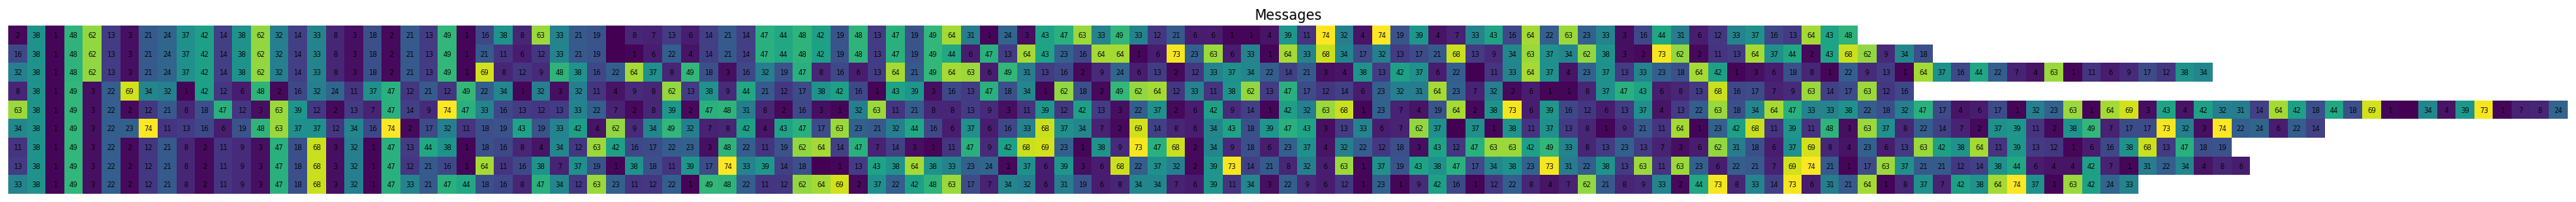

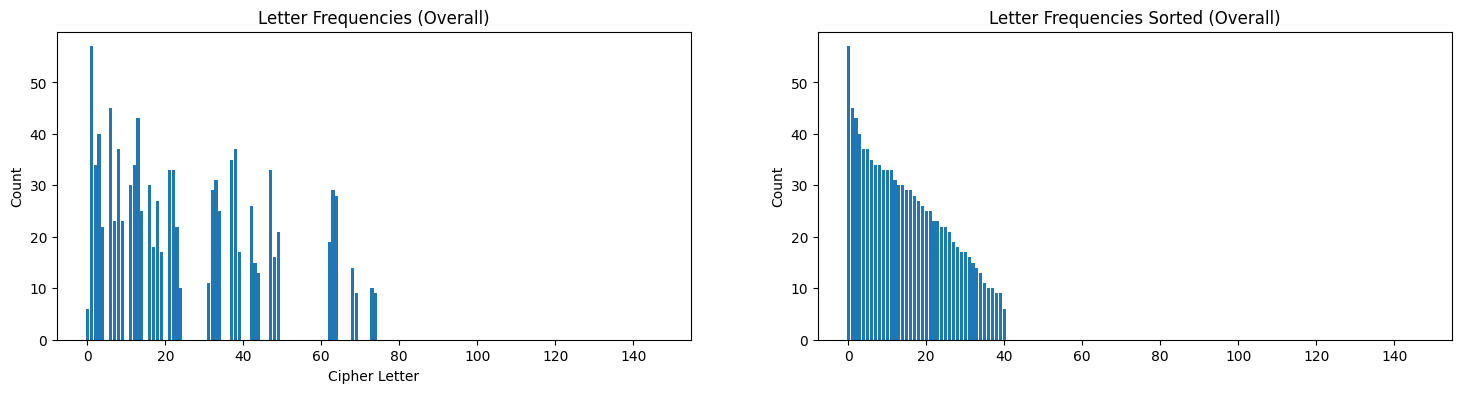

Letter Frequencies (Per message)
--------------------------------


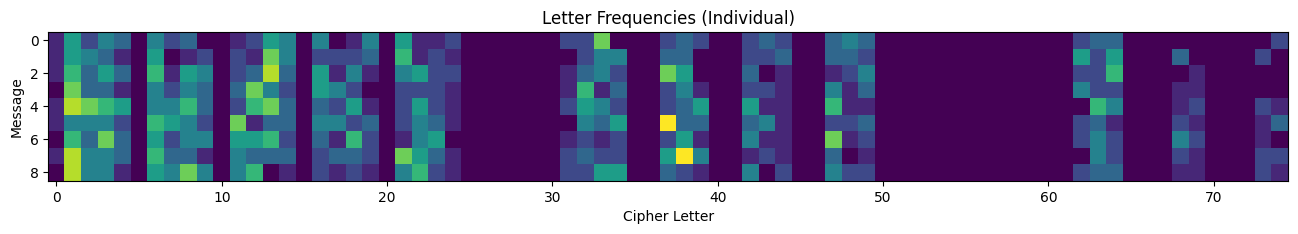

In [69]:
print("\nStraight Unrotated")
print("--------------------\n")
crypto.full_overview(eyeMessagesUnrotated)


Unrotated Unique
--------------------

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

 !"#$%&'()*+!$,+-.&/ '%0"1!.2-'34.5%6+'+78#*3#%7309:"(&;72-0-<'66""=>?@,=@3>=5-;19A2B-&18:6<-)1%9;#
1!"#$%&'()*+!$,+-.&/ '%0"'?6<-'34"6A=+'+78#*3#%730867%9;B199"6CB26-"9-DEF,%F'D%GE2)E$!& C$ ?%9)8 ;D$GE/
,!"#$%&'()*+!$,+-.&/ '%0"H.<G#!1A9).0/&1,37.16%9'09260:%1 G(6% <-)EA+'&=!%*)6A4?-9)=B)%-B/9*"&6/."AG%"9)18A5=2"?6GF<!E
.!"0&AHE,"*<6# 1,(?)7<'<0AE",&,?=G.$%!G8'<F!*1";>&1%7/E"$/ 0$9<-?!$%7F<+6B,:9B5, 6"".)7;6.%D1F5G2+F2<1
2!"0&A <'./7<&2>< %57+G@7-1%<%-A5 .> 7#:. 1&",2?'..%G&?><*%&A) 6*G+"*,2D"B5=39 !C6>1<6%)=%A2/E97--!A/,7F=6F",B2"9H&;=*,:+9*/8/H"4E=>C"5.(
E!"0&AB@?%163#2))<E1@ F,?/3;3-*=$GE0,5.*=;7F2B',816)61-D)E5 H+.6E;/>7;&%-65$)4)"!?)%."G'?9"B*D?>?#&2).A+5 )>? !05FFC,&@A(6A+
?!"0&A <'. ?G&7/D&,"7%8!"/1.=E<2*1FAB&#A?3$9+75+&"?7G*DHB"!GC7D EG/6B)=,A

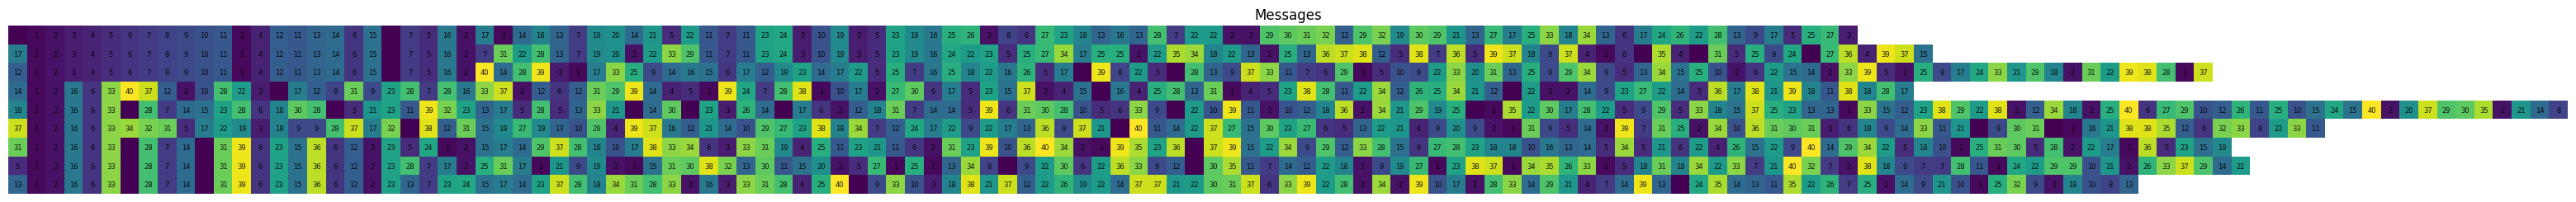

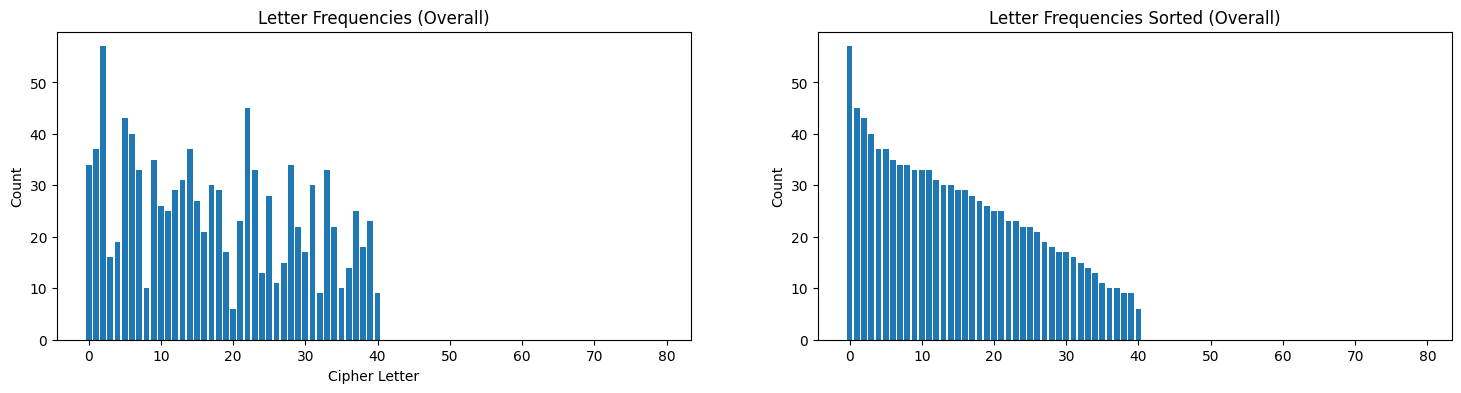

Letter Frequencies (Per message)
--------------------------------


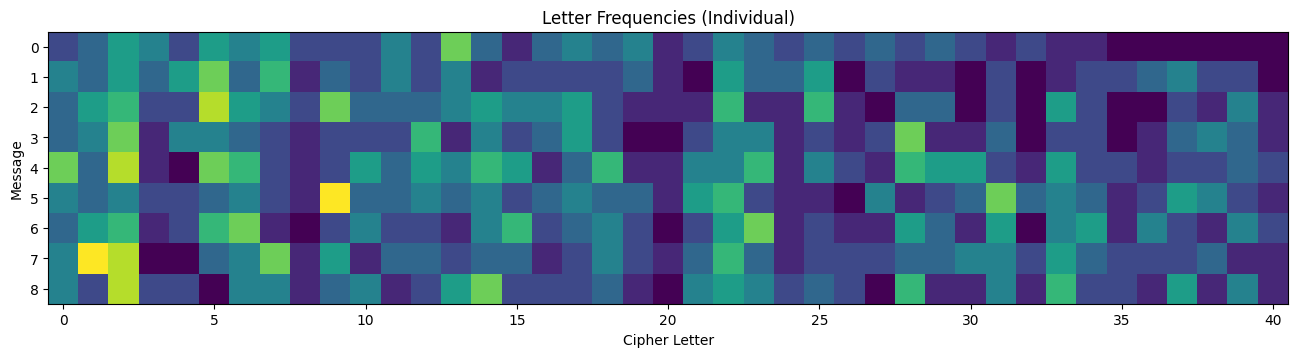

In [70]:
print("\nUnrotated Unique")
print("--------------------\n")
crypto.full_overview(eyeMessagesUnrotatedUnique)

Kappa Auto-Correlation Test
---------------------------


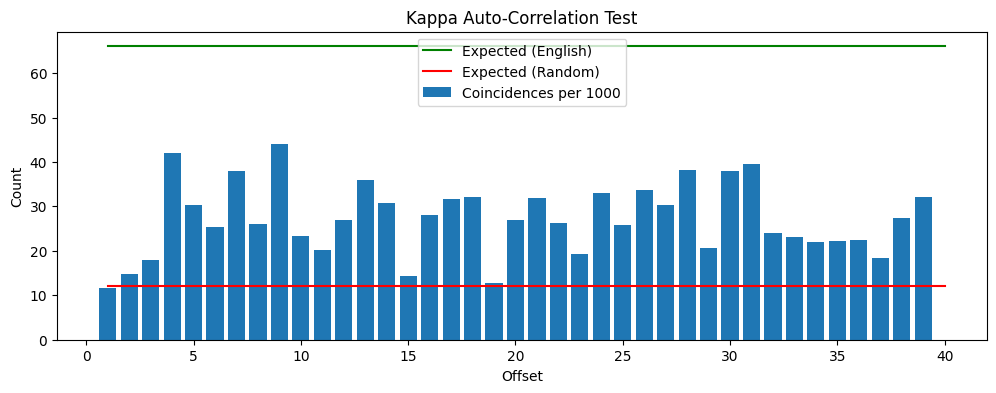


Kappa Periodic Test
-------------------


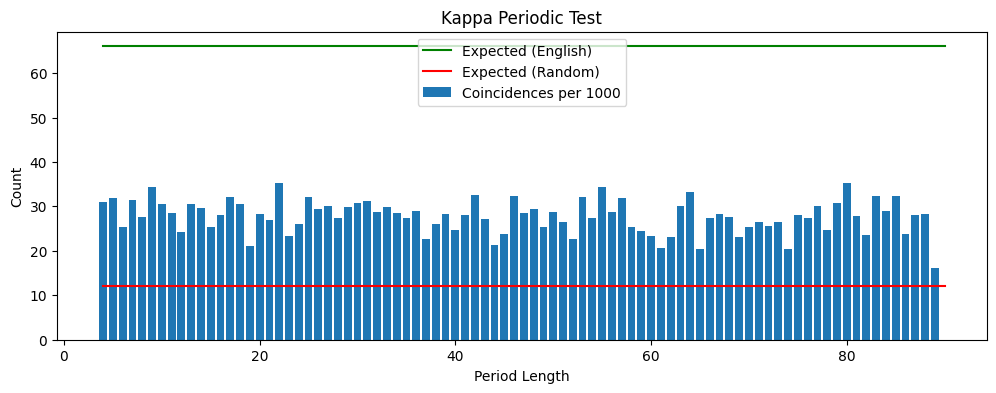

In [71]:
crypto.plot_msgs_kappa_auto(eyeMessagesUnrotated)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesUnrotated)

Kappa Auto-Correlation Test
---------------------------


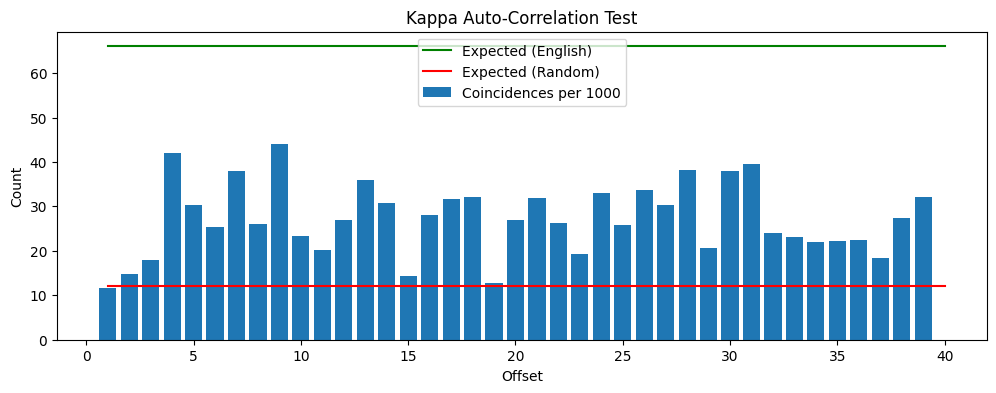


Kappa Periodic Test
-------------------


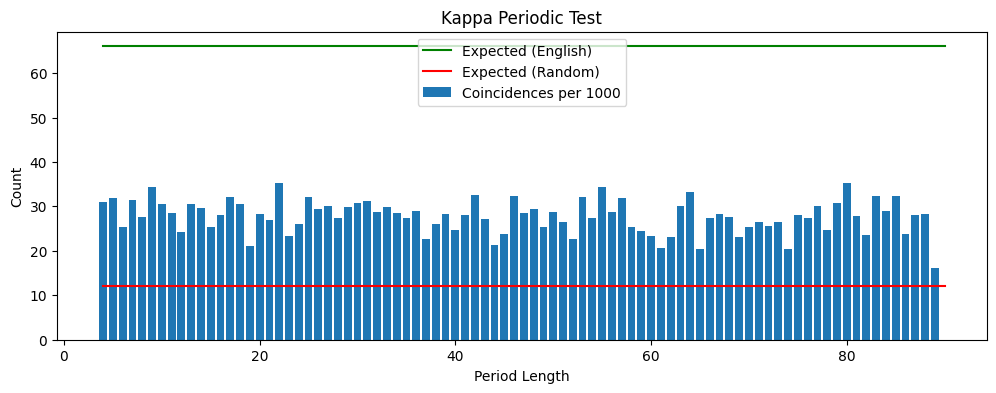

In [72]:
crypto.plot_msgs_kappa_auto(eyeMessagesUnrotatedUnique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesUnrotatedUnique)

# Variant: Alternated

---

In [73]:
# Calculate alternated eye messages
eyeMessagesAlternated = [ ]
eyeMessagesAlternatedUnique = [ ]
UID = crypto.UID()
for msg in eyeutil.msgs_eye_triflat:
  tris = []
  uTris = []
  i = 0
  for eye in msg:
    if i == 0:
      tris.append(eyeutil.conv_triflat_to_tri(eye))
      uTris.append(UID.get_uid(eyeutil.conv_triflat_to_tri(eye)))
    else:
      tris.append(eyeutil.conv_triflat_to_tri_flipped(eye))
      uTris.append(UID.get_uid(eyeutil.conv_triflat_to_tri_flipped(eye)))
    i = 1 - i
  eyeMessagesAlternated.append(tris)
  eyeMessagesAlternatedUnique.append(uTris)



Straight Alternated
----------------------

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

RZ%L^1kM8YJVb^@6q0/z"M-Q!lr<_q57 <SU:65VOPPF3L-G3Qh?%8#K[_AQIT5>>!9$g'jX$j3[$WIKp`Vcoq/(L?>,A]<1`KP
pZ%L^1kM8YJVb^@6q0/z"M-Q!M+:Tq57 9:f465VOPPF3L-G3QL>[u`KoHhh!:i3c&A9`qdB1@--5d-5N_YN^v/"i^"'a`EP*Kd^)N2
DZ%L^1kM8YJVb^@6q0/z"M-Q!il\)Lbl6hY<Qz#(X7O<p&-h=Q`c&Q?10"M8:u*TqYBff)/4buJE>. 'I`Y$7]aA72hF%/:z(!V=m9`Y0PVW4c9':=UTFN
lZ%QkfeB@%JT:LRl@8WYO,5,QfB9D#XS45(^-v)P=TUvJl%Kg/puOzB9^2*Q^hTq+Z^1O-TV:3@?`3CDR&!9(EOK:padp-'=_6Uc\(
_Z%Qkf"T=<nG\kc[\*a+O6Mj[Ap1\1q.CRHO"gP?l*pk!Xc'50HUMkWO\F-/6]"&Z5f%ZX_d9'$3h"Zi:g(,:aE416c2B`gIqr.n@O-$&1!D_%`i/K$bX?.hZ2Lze% B4[i9C08
BZ%Qkf7j+1<>3Lc]ETBHj"1D+23K3qJ4^5NQ@Wlb$KO-c5DL(>E:HIdYNS"eV(&NK2OOK/1A:C^E E!FSE1H9))+h%Jd+[+L#_]<66CR]O+*bQSa1eDkjf8:VV
;Z%Qkf"T=<"S)#[2d/D!OuLJ!2<p$N\cZl1fokPfW7^h.GSVk!+GMbdio9F=iGdRB=n>

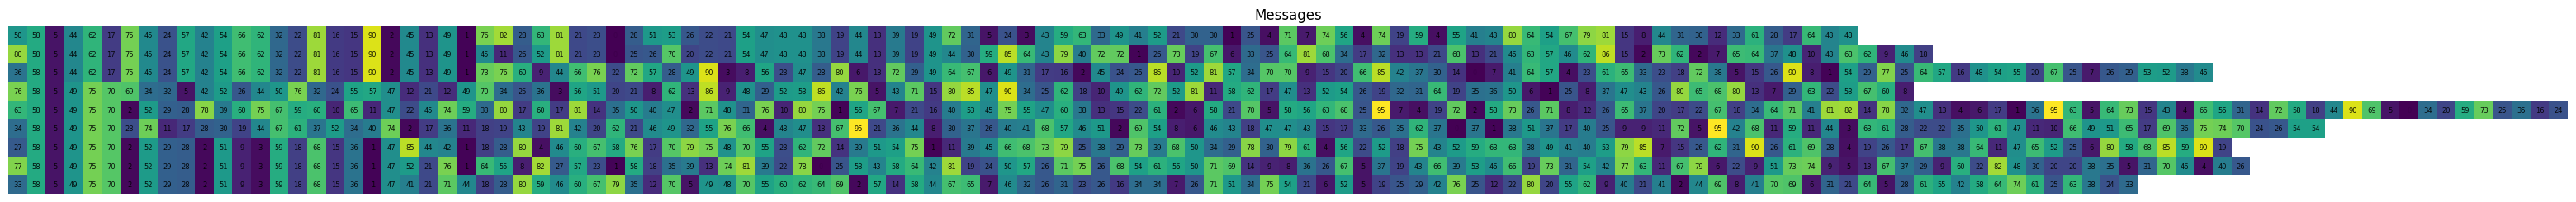

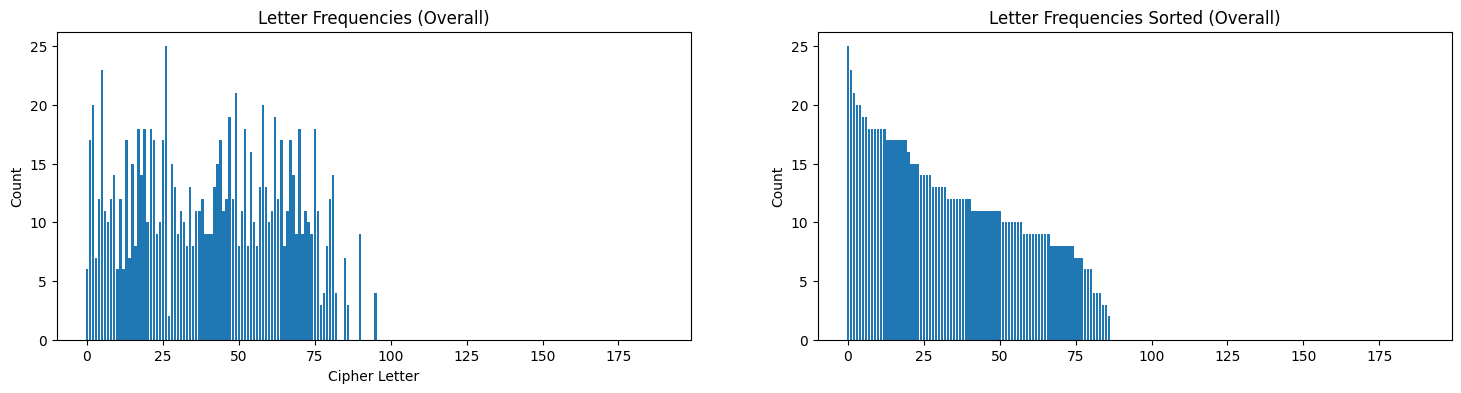

Letter Frequencies (Per message)
--------------------------------


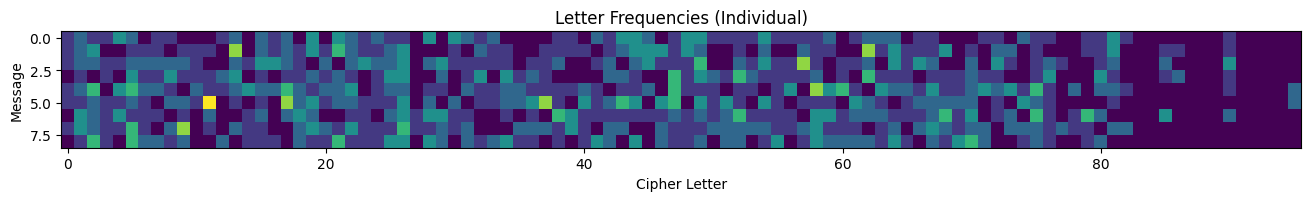

In [74]:
print("\nStraight Alternated")
print("----------------------\n")
crypto.full_overview(eyeMessagesAlternated)


Alternated Unique
--------------------

Overview
---------
Messages: 9
Message lengths: [99, 103, 118, 102, 137, 124, 119, 120, 114]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

 !"#$%&'()*+,$-./0123'456789:/;<=9>?@.;+ABBCD#4ED5FG"(HIJ:K5LM;NN6OPQRSTPSDJPULIVW+XY/1Z#GN[K\9%WIB
V!"#$%&'()*+,$-./0123'456']@M/;<=O@^_.;+ABBCD#4ED5#NJ`WIYaFF6@bDXcKOW/de%-44;d4;f:)f$g13b$3RhWiBjId$kfl
m!"#$%&'()*+,$-./0123'456b7nk#,7.F)952HZT<A9Vc4Fo5WXc5G%03'(@`jM/)e^^k1_,`*iNp=RLW)P<\hK<lFC"1@2Z6+oqOW)0B+U_XOR@o?MCf
7!"5&^re-"*M@# 7-(U)A[;[5^eOmHT>_;Z$4gkBoM?g*7"IQ1V`A2eO$lj5$FM/]!$%A4M+@D-GWDsm c6OZiAI@VhdV4Ro:.?XnZ
:!"5&^3Mo9tEn&XJnjh]A.'SJKV%n%/ps aA3QBG7jV&6TXR;0a?'&UAnC41.\3c!;^"!T:dOuRPDF3!b@QZ[@hi_%.XleWQL/8pt-A4Pc%6mu:"Wb1IP,TGpF!l#2r"=e_JbOs0(
e!"5&^<S]%9ND#X\iMeaS3%m]lDID/*_$;f5-U7,PIA4Xu;m#ZNi@aLd)f>3r+ZcfIlAAI1%K@s$i=i6C>i%aOkk]F"u*d]J]#H:\9..s \A]j,5>h%rm&S^(@++
v!"5&^3Mo93>kHJld1m6A`#*6l9VPfnX!7%^Y&B^U<$FpE>+&6]E',dbYOCobEd eotNY\PT

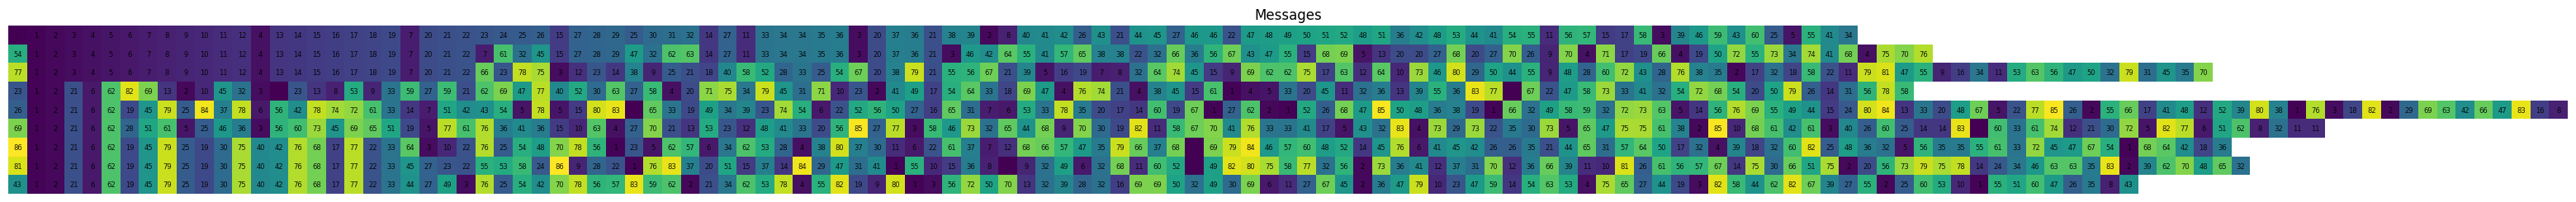

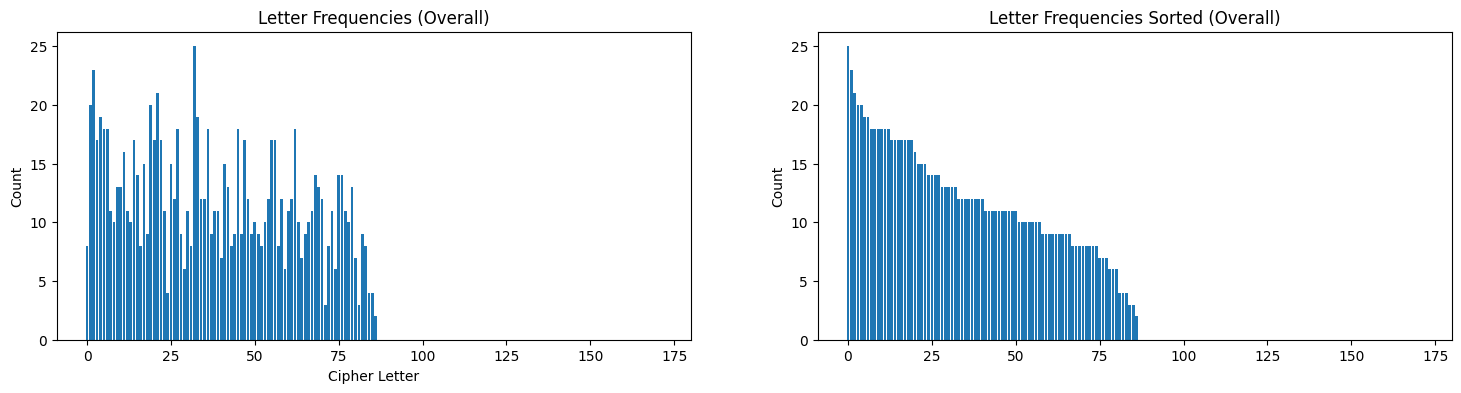

Letter Frequencies (Per message)
--------------------------------


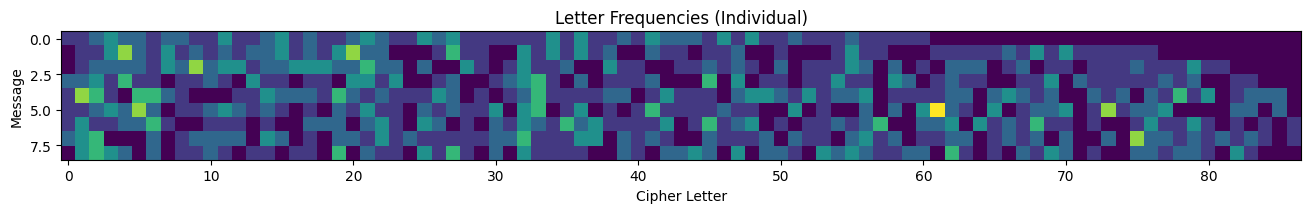

In [75]:
print("\nAlternated Unique")
print("--------------------\n")
crypto.full_overview(eyeMessagesAlternatedUnique)

Kappa Auto-Correlation Test
---------------------------


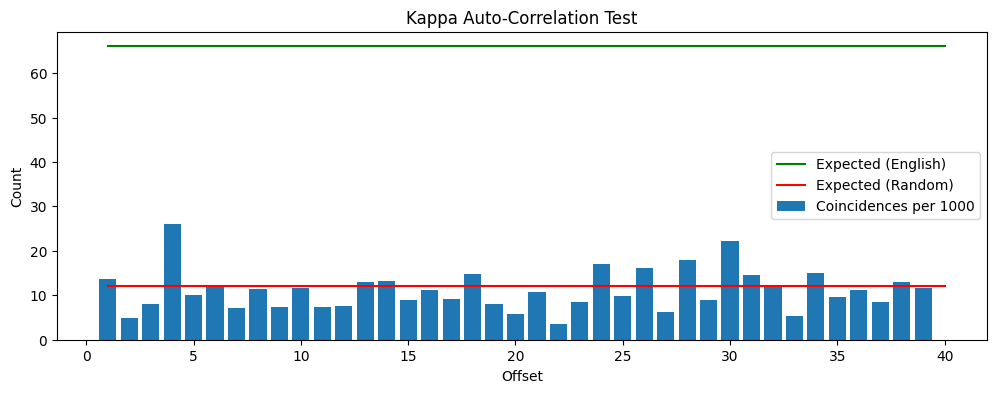


Kappa Periodic Test
-------------------


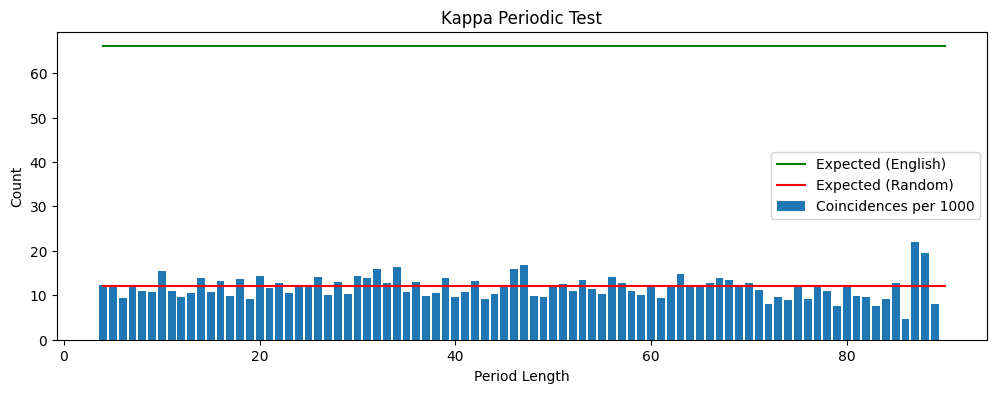

In [76]:
crypto.plot_msgs_kappa_auto(eyeMessagesAlternated)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesAlternated)

Kappa Auto-Correlation Test
---------------------------


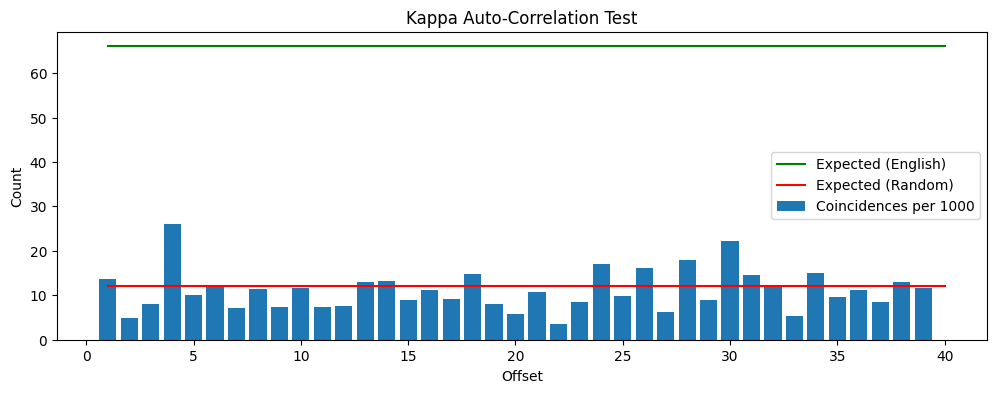


Kappa Periodic Test
-------------------


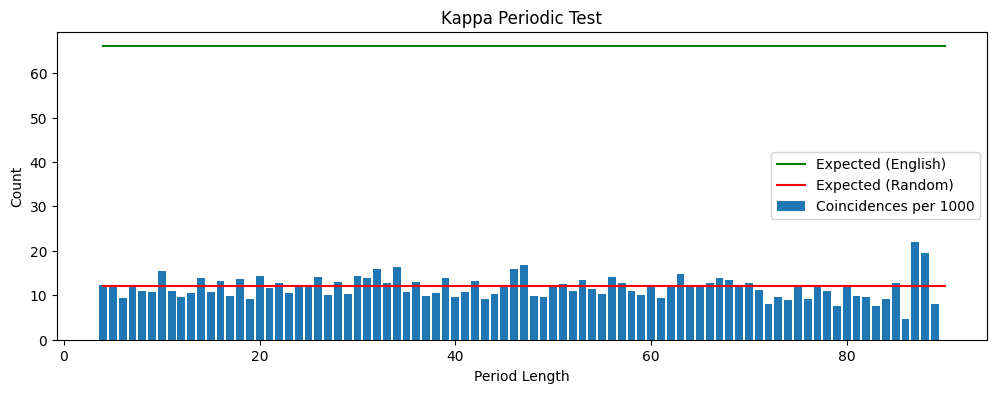

In [77]:
crypto.plot_msgs_kappa_auto(eyeMessagesAlternatedUnique)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesAlternatedUnique)

# Variant: Diagonal

---

In [78]:
# Get diagonal letters
def diagonalEye(eye, alt):
  return [ int(eye[0]), int(eye[2]), int(eye[1]) ] if not alt else [ int(eye[1]), int(eye[2]), int(eye[0]) ]

def diagonalMessage(msg):
  newMsg = []
  for i, eye in enumerate(msg):
    newMsg += diagonalEye(eye, i % 2 == 1)
  return newMsg

eyeMessagesDiagonal = [ diagonalMessage(msg) for msg in eyeutil.msgs_eye_triflat ]

In [79]:
from collections import Counter

print("\nDiagonal Count")
print("----------------\n")
counters = [ Counter(msg) for msg in eyeMessagesDiagonal ]
print(counters[0])
print(counters[1])
print(counters[0][0] + counters[0][1] + counters[0][3] + counters[0][4])
print(counters[1][0] + counters[1][2] + counters[1][3] + counters[1][4])


Diagonal Count
----------------

Counter({1: 76, 0: 70, 2: 55, 3: 50, 4: 46})
Counter({2: 72, 0: 70, 1: 69, 3: 53, 4: 45})
242
240



Diagonal
----------

Overview
---------
Messages: 9
Message lengths: [297, 309, 354, 306, 411, 372, 357, 360, 342]

Ascii of message (1 - 9)
-------------------------
Note: This will break for messages with values > 95

"  #!"  !$#!""""# #   $! $$"!"!"#$ ""!#"""!"!"$ #!!!#   # ## "  $! #"$$! ! ! ##"!# !"#"!!# !$#$    # !"! # "!! "$  !$$ "!"$#$!!#$#"! $#$#! #"$"! $#$$!""$!!!  !$$  # ##!"$!#""!#!$$!!!#" " !$ !!! !!  !  $  "!$"! "$$!!" $ $$" $#$!" $  !"!!###!# !$"""$ "#"#$ !!#  ##! !$#!!!! !"" !#!!""!# "# "$"##!!#$
# !#!"  !$#!""""# #   $! $$"!"!"#$ ""!#"""!"!"$ #!!!#   # ## "  $! #"$$! !  $! !"! !"" !!# !$#$      !!!  $"  $"$  !$$ "!"$#$!!#$#"! $#$#! #"$"! $#$$!!$# !!"$! "#"$"##!#$  #!""$"$" ! ! !"#$$# ""#!! !#!  !"$"!!#"##$!! "#"!! #"#"  !$##" #"!$ !!$#""""!!$!"""!"#  #"  "#$""" " "! " #$""!""#$!  "##!"##""" $!!$! ##
!!"#!"  !$#!""""# #   $! $$"!"!"#$ ""!#"""!"!"$ #!!!#   # ## "  $! #"$$! ! #$"#!  "" $!$#!"!#! # "$"$"""!# !!$$ ## # #! "!!#$ !"$# !# !!!  #""$"!$ $$!"$""#" !!$$!!!!"#  !#

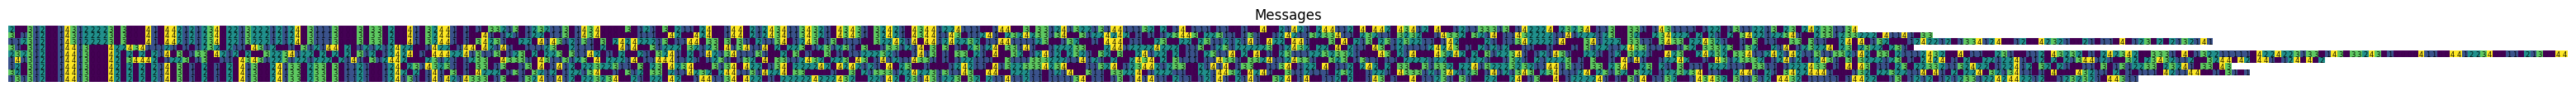

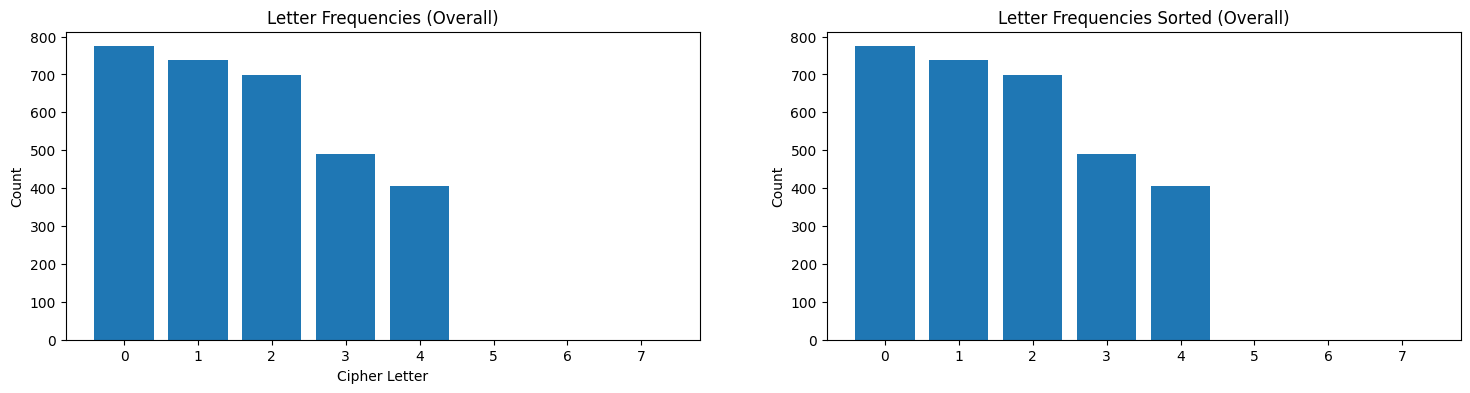

Letter Frequencies (Per message)
--------------------------------


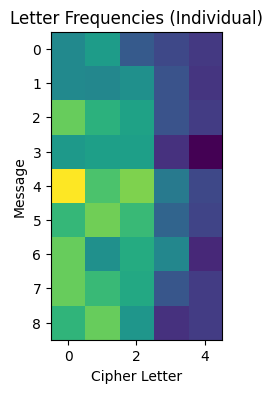

In [80]:
print("\nDiagonal")
print("----------\n")
crypto.full_overview(eyeMessagesDiagonal)

Kappa Auto-Correlation Test
---------------------------


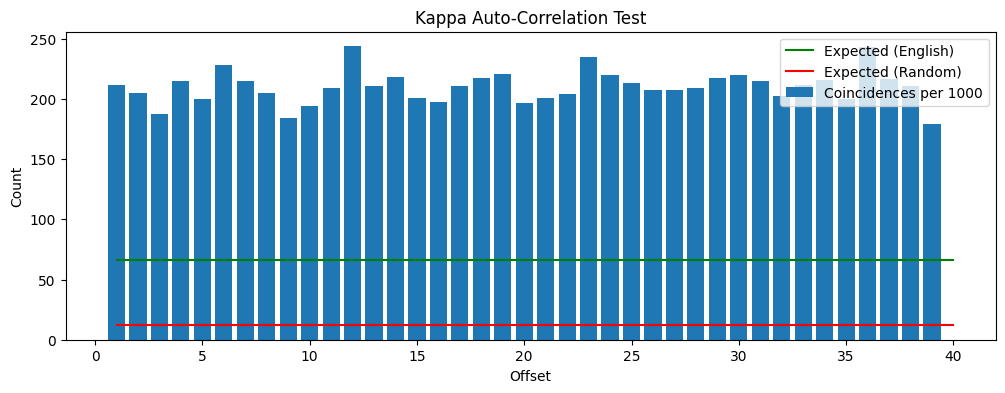


Kappa Periodic Test
-------------------


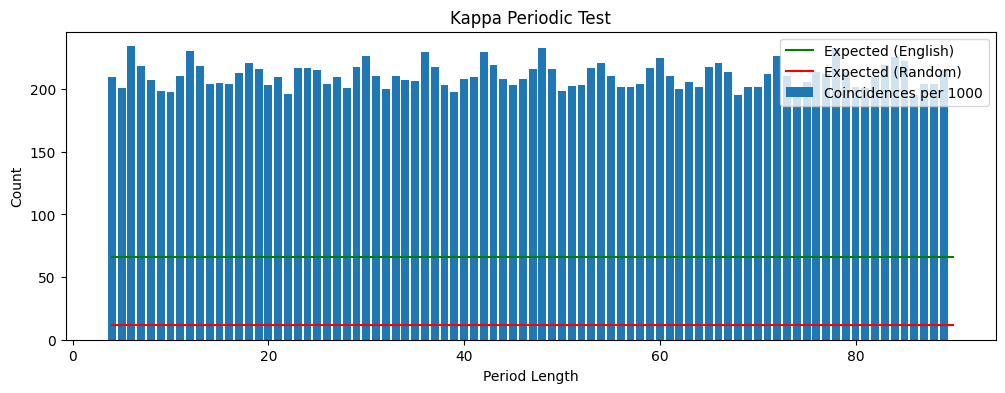

In [81]:
crypto.plot_msgs_kappa_auto(eyeMessagesDiagonal)
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesDiagonal)

In [83]:
# Get diagonal overlapped
eyeMessagesDiagonalOverlapped = []
eyeMessagesDiagonalOverlappedUnique = []

UID = crypto.UID()
for i in range(5):
  east = eyeMessagesDiagonal[i * 2]
  west = eyeMessagesDiagonal[i * 2 + 1] if i < 4 else []

  overlapped = []
  overlappedUnique = []
  for o in range(max(len(east), len(west))):
    value = ""
    if o < len(east):
      value = (str(east[o]) + value) if (value == "" or east[o] < int(value)) else (value + str(east[o]))
    if o < len(west):
      value = (str(west[o]) + value) if (value == "" or west[o] < int(value)) else (value + str(west[o]))
    if len(value) == 1:
      value = value + value

    # Value will like the following:
    #   0 on 0 = 00
    #   0 on 1 = 01
    #   1 on 0 = 01
    #   4 on 2 = 24
    #   2 on 2 = 22
    #   3 on None = 33

    overlapped.append(value)
    overlappedUnique.append(UID.get_uid(value))

  eyeMessagesDiagonalOverlapped.append(overlapped)  
  eyeMessagesDiagonalOverlappedUnique.append(overlappedUnique)

In [84]:
print("\nDiagonal Overlapped")
print("--------------------\n")
for msg in eyeMessagesDiagonalOverlapped:
  print(msg)

print("")
print(UID.map)
print("".join([ chr(v + 65) for v in range(15) ]))

print("")
for msg in eyeMessagesDiagonalOverlappedUnique:
  print("".join([ chr(v + 65) for v in msg ]))


Diagonal Overlapped
--------------------

['23', '00', '01', '33', '11', '22', '00', '00', '11', '44', '33', '11', '22', '22', '22', '22', '33', '00', '33', '00', '00', '00', '44', '11', '00', '44', '44', '22', '11', '22', '11', '22', '33', '44', '00', '22', '22', '11', '33', '22', '22', '22', '11', '22', '11', '22', '44', '00', '33', '11', '11', '11', '33', '00', '00', '00', '33', '00', '33', '33', '00', '22', '00', '00', '44', '11', '00', '33', '22', '44', '44', '11', '00', '11', '00', '01', '04', '13', '03', '12', '12', '13', '00', '11', '22', '23', '02', '11', '11', '33', '00', '11', '44', '33', '44', '00', '00', '00', '00', '03', '00', '11', '12', '11', '00', '03', '04', '22', '01', '01', '04', '22', '44', '00', '00', '11', '44', '44', '00', '22', '11', '22', '44', '33', '44', '11', '11', '33', '44', '33', '22', '11', '00', '44', '33', '44', '33', '11', '00', '33', '22', '44', '22', '11', '00', '44', '33', '44', '44', '11', '12', '24', '34', '01', '11', '11', '02', '04', '11', '0


Diagonal Overlapped Unique
--------------------

Overview
---------
Messages: 4
Message lengths: [309, 354, 411, 360]

Ascii of message (1 - 4)
-------------------------
Note: This will break for messages with values > 95

 !"#$%!!$&#$%%%%#!#!!!&$!&&%$%$%#&!%%$#%%%$%$%&!#$$$#!!!#!##!%!!&$!#%&&$!$!"'()**(!$% +$$#!$&#&!!!!)!$*$!)'%""'%&!!$&&!%$%&#&$$#&#%$!&#&#$!#%&%$!&#&&$*,-"$$+'$',)+-+##$ &") ** .,&*"$)*!*+(&'("*+($"!$)"'!"%.,*$)%--.$*!,),.*!- -*+!.')(%"( (-"(".-%%%,"*-* ,+$*#!!# "!*--***"+"%*!*)(.%%$ + -"+'%##$*#-%%%!&$$&$!##
($+#$%!!$&-$ +++-+ ')'.$",.+$+$%#,!%*$), **+"*')(*$.-!+!(+( "%'+,"!(,,,"".')&%(."!+*".*-)"%$($! !+&*&++ $ +*"-," #!-"#."*." '+* '(+((+($")!)* -**.''-" '*+  "*.'-($.$+)"+*  )!"!,&&"**++, +++*" )$* $%*,*+-+*+&-*!++)''+*$)' )$%(**$*'*& !"!+**"*").*++*"'!"!#.*%**+-#($"(')()%+-# *)!$) !"*"')(+#**'!%-!,)* ++)""%&%%$%!$##&$%&!!$%!!&%#%$!!%$!$$!&!$%#!%!%$#%$&$
*-*#$%!!$&&$#!!!&%! ','%".+ )"(#!'*$+' ')(%%#.*%*+%+++*'(" "*,&%'!"+-.,*+.*#(")'( #"+' *()(*(',!*+%"'+$"-,&$"%"

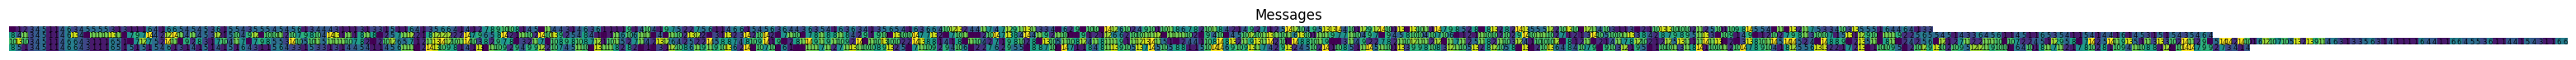

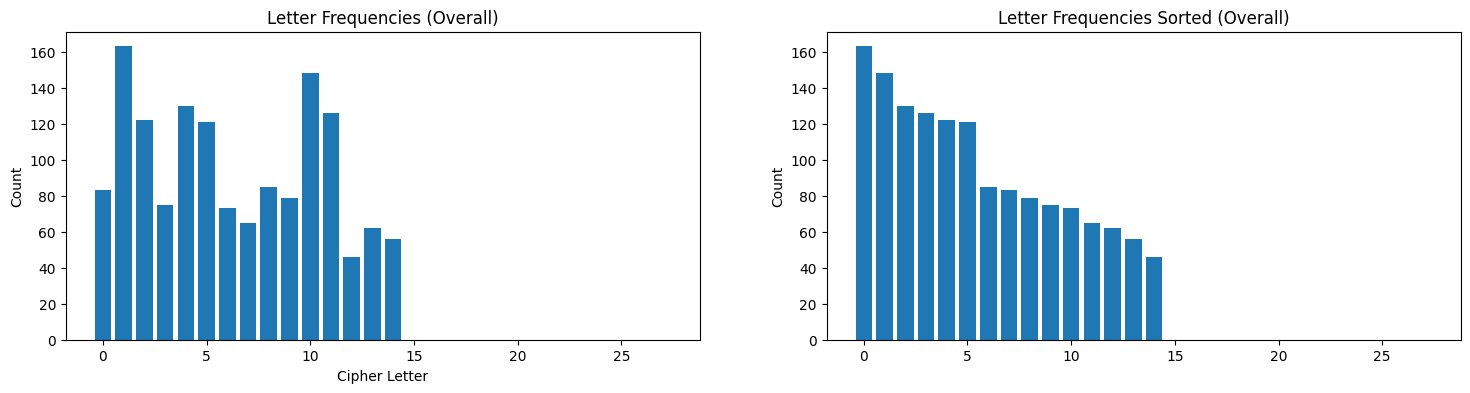

Letter Frequencies (Per message)
--------------------------------


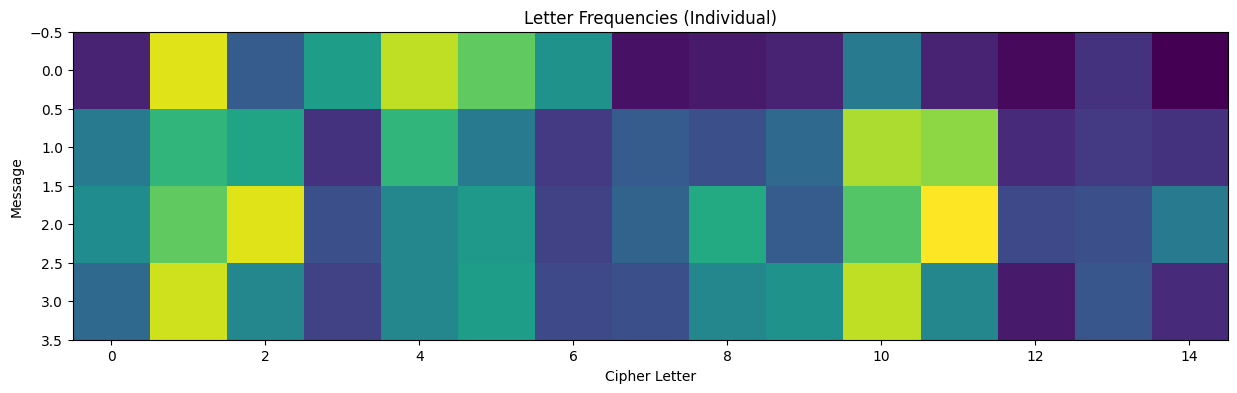

In [85]:
print("\nDiagonal Overlapped Unique")
print("--------------------\n")
crypto.full_overview(eyeMessagesDiagonalOverlappedUnique[:4])

Kappa Auto-Correlation Test
---------------------------


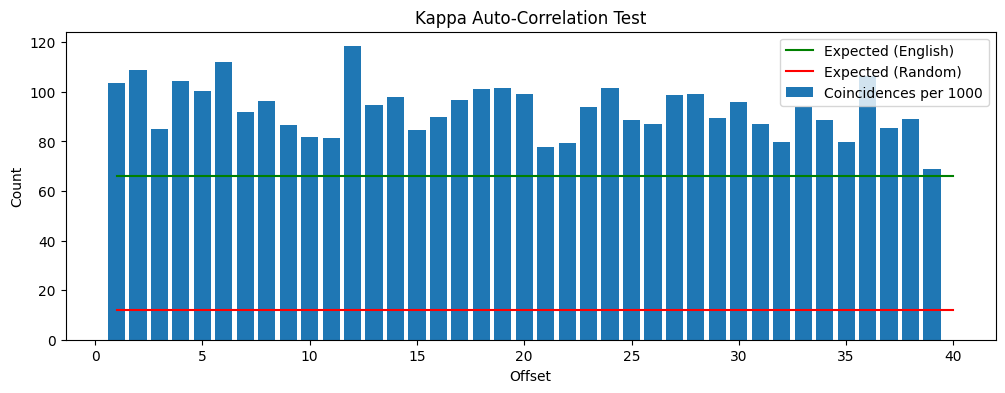


Kappa Periodic Test
-------------------


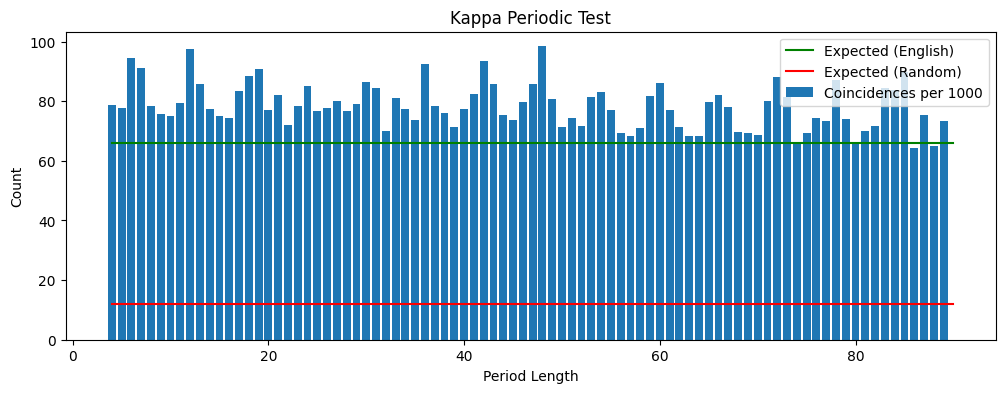

In [87]:
crypto.plot_msgs_kappa_auto(eyeMessagesDiagonalOverlappedUnique[:4])
print("")
crypto.plot_msgs_kappa_periodic(eyeMessagesDiagonalOverlappedUnique[:4])

# Other

---

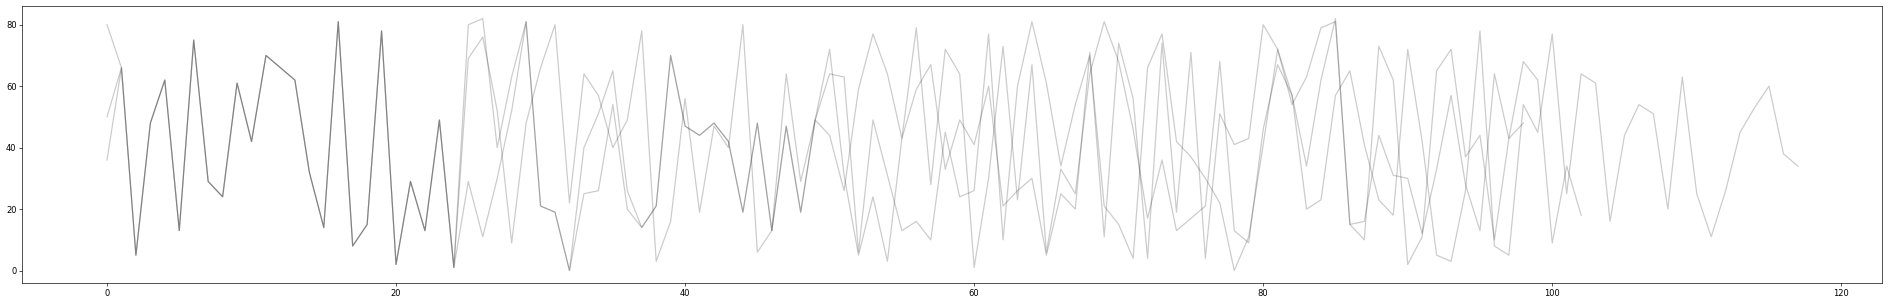

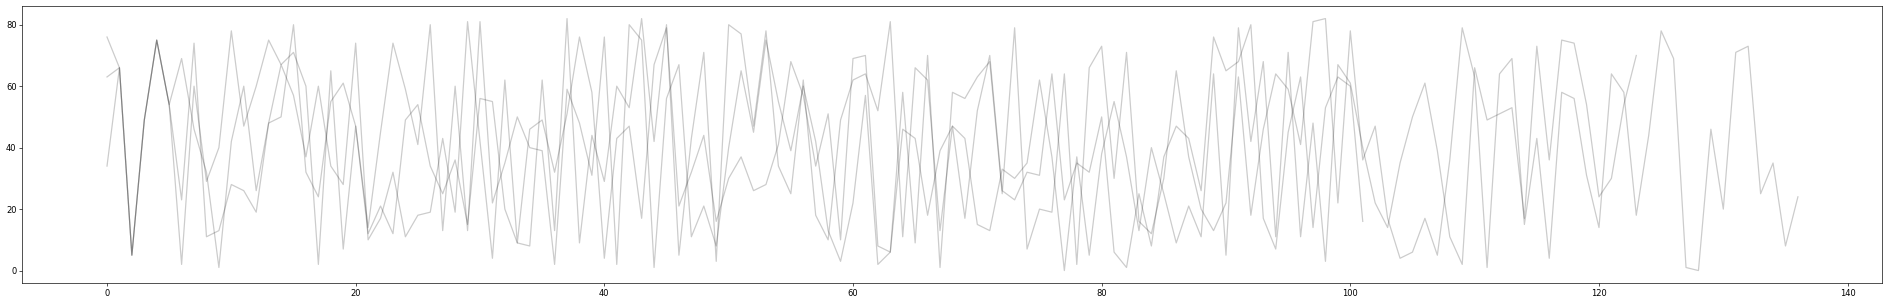

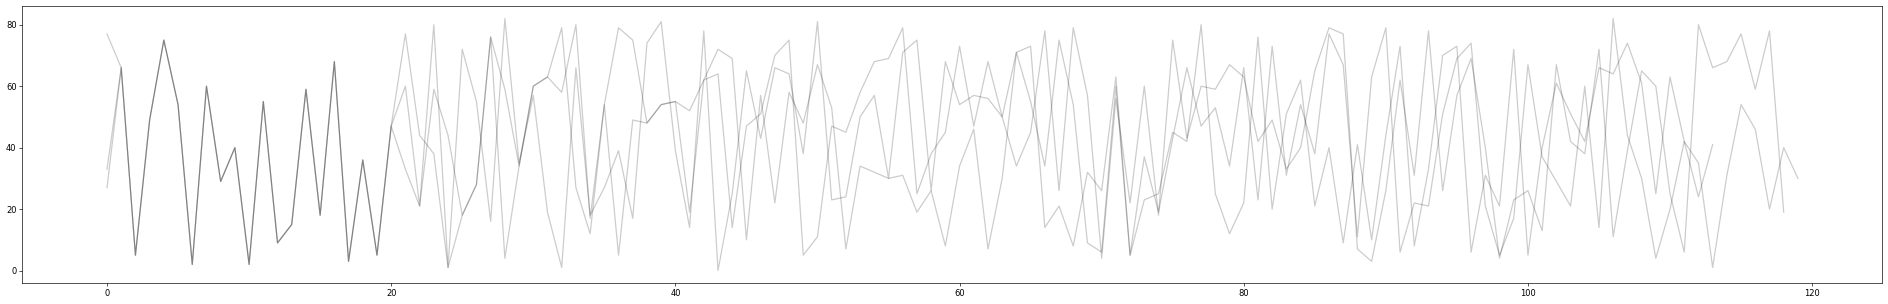

In [90]:
plt.figure(figsize=(40, 6), dpi=60)
for msg in eyeutil.msgs_eye_tri[:3]:
  plt.plot(msg, c="black", alpha=0.2)

plt.figure(figsize=(40, 6), dpi=60)
for msg in eyeutil.msgs_eye_tri[3:6]:
  plt.plot(msg, c="black", alpha=0.2)

plt.figure(figsize=(40, 6), dpi=60)
for msg in eyeutil.msgs_eye_tri[6:]:
  plt.plot(msg, c="black", alpha=0.2)